# Importação de packages

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from IPython.display import display
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Carregamento e visualização do dataset

In [7]:
# Carregamento dos dados
features = pd.read_csv("cyp2c9_features.csv")
labels = pd.read_csv("cyp2c9_outputs.csv")

# Verificar formato
print("Features:", features.shape)
print("Labels:", labels.shape)

# Juntar num DataFrame para análise exploratória
data = features.copy()
data["target"] = labels["Y"]

# Visualizar
display(data.head())

Features: (11934, 208)
Labels: (11934, 3)


MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
0       12.820479       -0.183140          12.820479           0.128619   
1        6.126257        0.660427           6.126257           0.660427   
2        5.719940       -0.219974           5.719940           0.075509   
3       12.040634       -0.208718          12.040634           0.006714   
4       13.082813       -0.044883          13.082813           0.018472   

        qed    MolWt  HeavyAtomMolWt  ExactMolWt  NumValenceElectrons  \
0  0.457873  362.476         344.332   362.07590                126.0   
1  0.756902  255.708         245.628   255.05632                 88.0   
2  0.605920  421.549         390.301   421.25900                164.0   
3  0.728361  324.344         308.216   324.13348                122.0   
4  0.457249  495.628         458.332   495.29578                194.0   

   NumRadicalElectrons  ...  fr_sulfonamd  fr_sulfone  fr_term_acetylene  \
0                  0.0  ...           0.0         0.0                0.0   
1                  0.0  ...           0.0         0.0                0.0   
2                  0.0  ...           0.0         0.0                0.0   
3                  0.0  ...           0.0         0.0                0.0   
4                  0.0  ...           0.0         0.0                0.0   

   fr_tetrazole  fr_thiazole  fr_thiocyan  fr_thiophene  fr_unbrch_alkane  \
0           0.0          0.0          0.0           0.0               1.0   
1           0.0          0.0          0.0           0.0               0.0   
2           1.0          0.0          0.0           0.0               0.0   
3           1.0          0.0          0.0           0.0               0.0   
4           1.0          0.0          0.0           0.0               0.0   

   fr_urea  target  
0      0.0       1  
1      0.0       1  
2      0.0       1  
3      0.0       1  
4      0.0       0  

[5 rows x 209 columns]

# Análise Exploratória

#### Verificar valores em falta

In [8]:
print("Valores nulos:", data.isnull().sum().sum())

Valores nulos: 0


#### Estatísticas descritivas

In [9]:
display(data.describe())

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex  \
count    11934.000000    11934.000000       11934.000000       11934.000000   
mean        11.274808       -0.879382          11.274808           0.192623   
std          2.689638        1.442954           2.689638           0.224866   
min          2.269884       -7.603764           2.269884           0.000000   
25%         10.896393       -1.063285          10.896393           0.043124   
50%         12.242406       -0.402087          12.242406           0.116725   
75%         12.924319       -0.062750          12.924319           0.237865   
max         17.398045        3.500000          17.398045           3.811700   

                qed         MolWt  HeavyAtomMolWt    ExactMolWt  \
count  11934.000000  11934.000000    11934.000000  11934.000000   
mean       0.611521    355.016700      334.581007    354.626917   
std        0.191307    108.988404      103.017461    108.873587   
min        0.021258     33.030000       30.006000     33.021465   
25%        0.481696    289.292000      272.175000    289.024430   
50%        0.632182    347.435000      327.159000    347.133635   
75%        0.772312    409.507250      386.231750    409.140095   
max        0.947210   1664.922000     1579.242000   1663.492300   

       NumValenceElectrons  NumRadicalElectrons  ...  fr_sulfonamd  \
count         11934.000000              11934.0  ...  11934.000000   
mean            131.051114                  0.0  ...      0.073571   
std              40.828041                  0.0  ...      0.271160   
min              14.000000                  0.0  ...      0.000000   
25%             106.000000                  0.0  ...      0.000000   
50%             128.000000                  0.0  ...      0.000000   
75%             152.000000                  0.0  ...      0.000000   
max             606.000000                  0.0  ...      3.000000   

         fr_sulfone  fr_term_acetylene  fr_tetrazole   fr_thiazole  \
count  11934.000000       11934.000000  11934.000000  11934.000000   
mean       0.011061           0.004190      0.009804      0.032261   
std        0.104592           0.064595      0.101878      0.189071   
min        0.000000           0.000000      0.000000      0.000000   
25%        0.000000           0.000000      0.000000      0.000000   
50%        0.000000           0.000000      0.000000      0.000000   
75%        0.000000           0.000000      0.000000      0.000000   
max        1.000000           1.000000      2.000000      4.000000   

        fr_thiocyan  fr_thiophene  fr_unbrch_alkane       fr_urea  \
count  11934.000000  11934.000000      11934.000000  11934.000000   
mean       0.000168      0.062929          0.127786      0.044076   
std        0.012945      0.250991          0.774506      0.213281   
min        0.000000      0.000000          0.000000      0.000000   
25%        0.000000      0.000000          0.000000      0.000000   
50%        0.000000      0.000000          0.000000      0.000000   
75%        0.000000      0.000000          0.000000      0.000000   
max        1.000000      2.000000         26.000000      4.000000   

             target  
count  11934.000000  
mean       0.337272  
std        0.472798  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  

[8 rows x 209 columns]

#### Distribuição da variável alvo

Decidimos verificar a distribuição da variável alvo ('target') para entender o balanço entre as classes, ou seja, quantas moléculas inibem (classe '1') e quantas não inibem (classe '0') a enzima CYP2C9. Um desequilíbrio significativo entre as classes pode afetar o desempenho dos modelos de classificação e exigir abordagens específicas durante o treino.

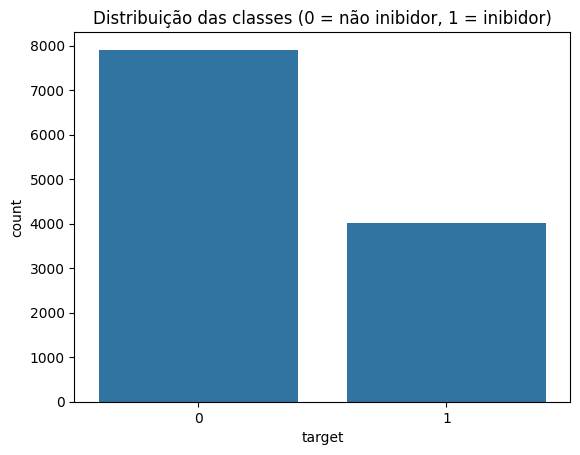

In [10]:
sns.countplot(x="target", data=data)
plt.title("Distribuição das classes (0 = não inibidor, 1 = inibidor)")
plt.show()


Através do gráfico de barras da distribuição da variável 'target', é possível constatar que o dataset apresenta um desequilíbrio de classes. A classe '0' (não inibidores) é significativamente mais predominante do que a classe '1' (inibidores). Este desequilíbrio é importante para ser considerado nas fases posteriores do trabalho, especialmente na escolha de métricas de avaliação (como AUC, F1-score, Precision e Recall, em vez de apenas acurácia) e, se necessário, em técnicas de reamostragem (oversampling ou undersampling) para mitigar o viés do modelo para a classe majoritária.

#### Correlação com a variável alvo

Para conseguir apurar quais as variáveis que se correlacionavam mais com a nossa variável alvo ('target'), realizámos uma análise específica para identificar os descritores químicos com as correlações lineares mais fortes.

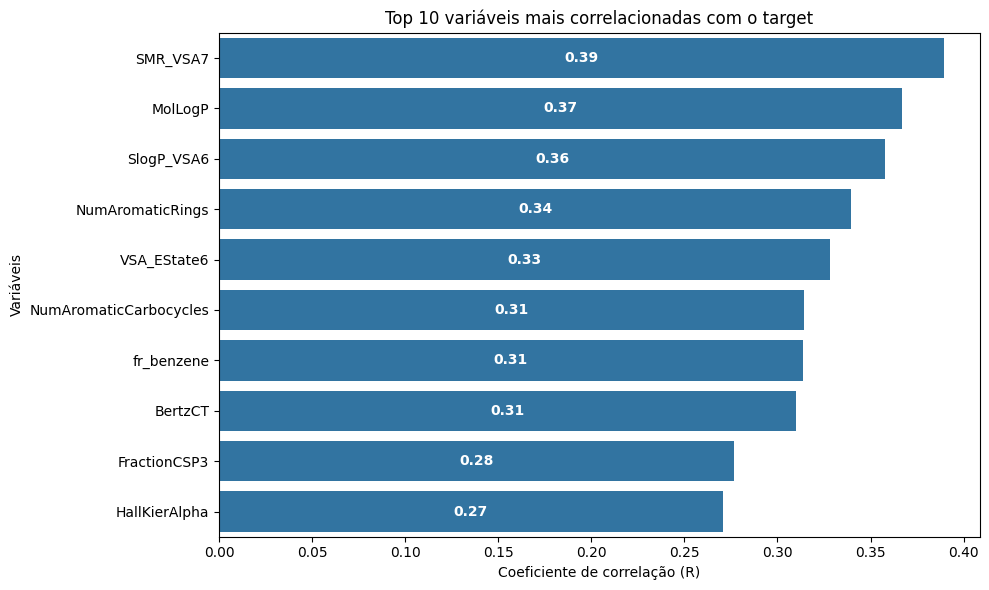

In [11]:
corr = data.corr().abs()["target"].sort_values(ascending=False)[1:11]


# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=corr.values, y=corr.index)

# Adicionar os valores dentro das barras
for i, v in enumerate(corr.values):
    ax.text(v/2, i, f'{v:.2f}', 
            ha='center', va='center', 
            fontweight='bold', 
            color='white', 
            fontsize=10)


plt.title("Top 10 variáveis mais correlacionadas com o target")
plt.xlabel("Coeficiente de correlação (R)")
plt.ylabel("Variáveis")
plt.tight_layout()
plt.show()

Através do gráfico de barras, conseguimos perceber que as variáveis "SMR_VSA7", "MolLogP", "SlogP_VSA6", "NumAromaticRings", "VSA_EState6", "NumAromaticCarbocycles", "fr_benzene", "BertzCT", "FractionCSP3" e "HallKierAlpha" são as 10 mais correlacionadas com a variável `target`.

Podemos também constatar que a variável com maior correlação com a variável target é a variável "SMR_VSA7", com um valor de 0.39. No entanto, este valor é considerado fraco, não sendo possível estabelecer uma correlação forte ou média entre esta variável e a variável "target". Isso sugere que a inibição da CYP2C9 é provavelmente um fenómeno complexo, influenciado por múltiplas características de forma não linear, ou por interações entre elas, em vez de ser dominada por uma única propriedade química. Isto reforça a necessidade de utilizar modelos multivariados (incluindo a regressão logística multivariada) e algoritmos capazes de capturar relações não-lineares e interações complexas entre as features como Random Forest, SVM e KNN.

#### Distribuição das variáveis

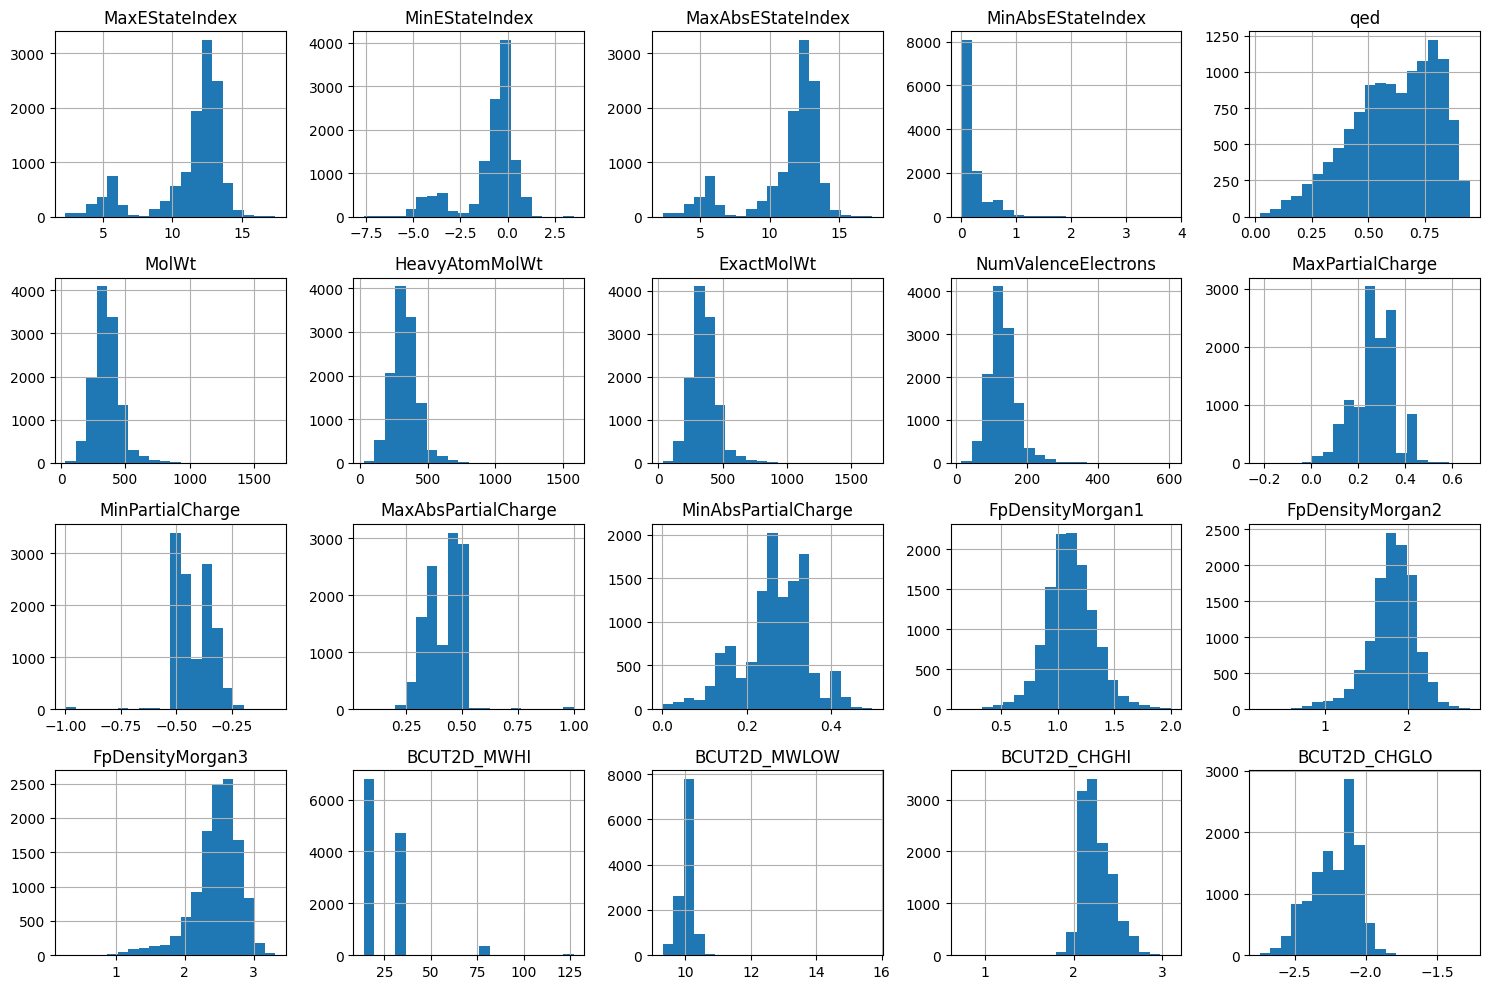

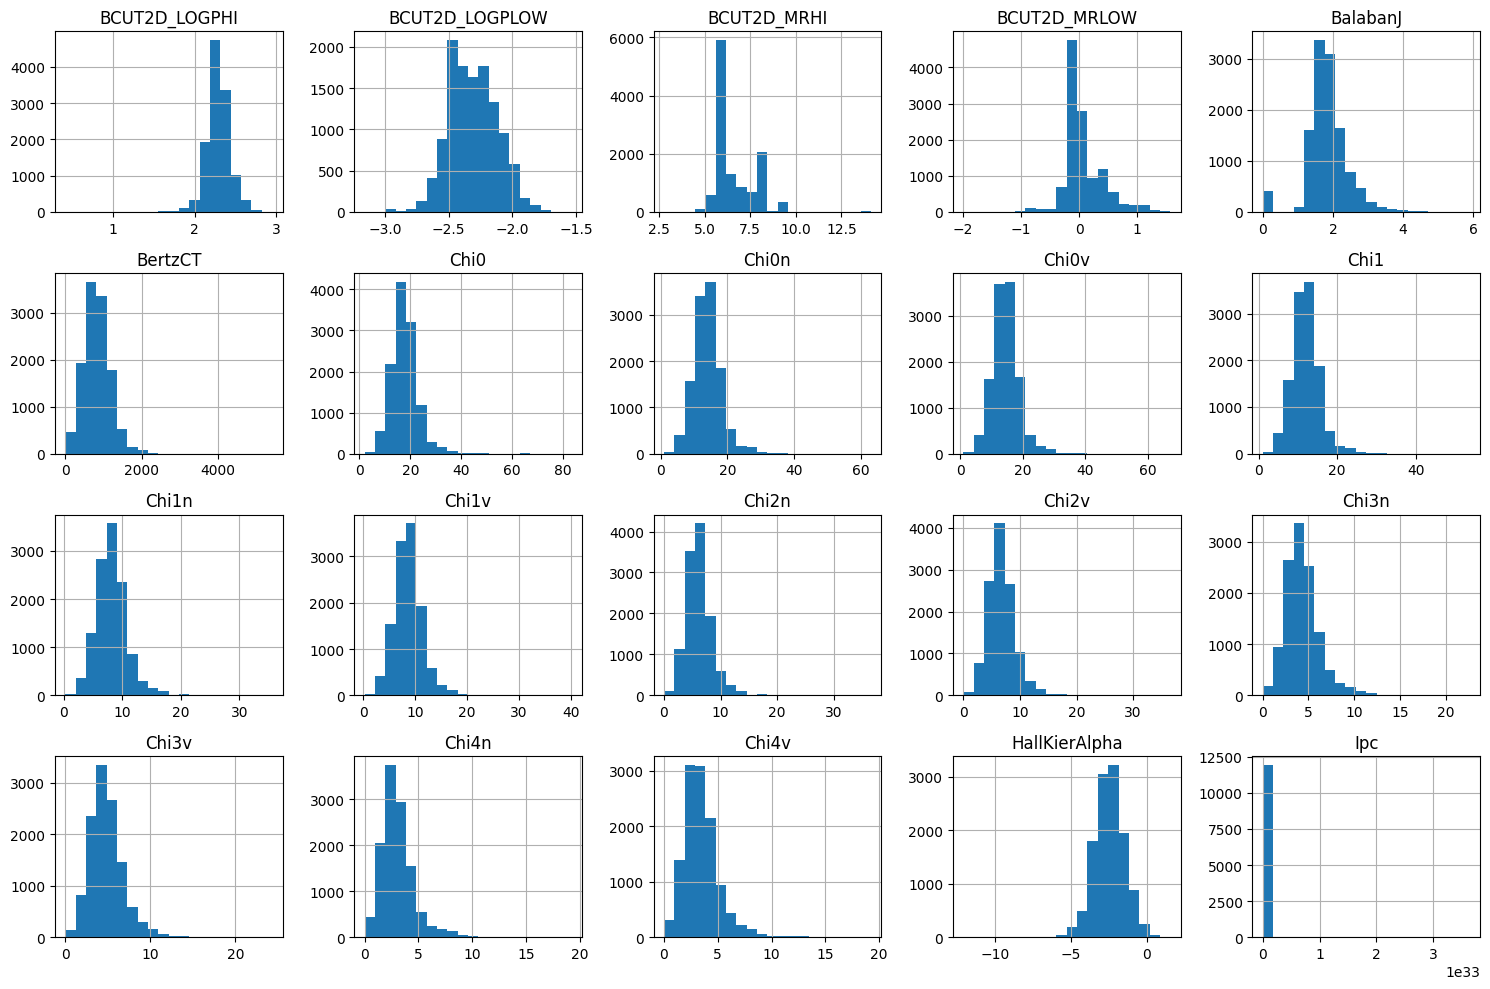

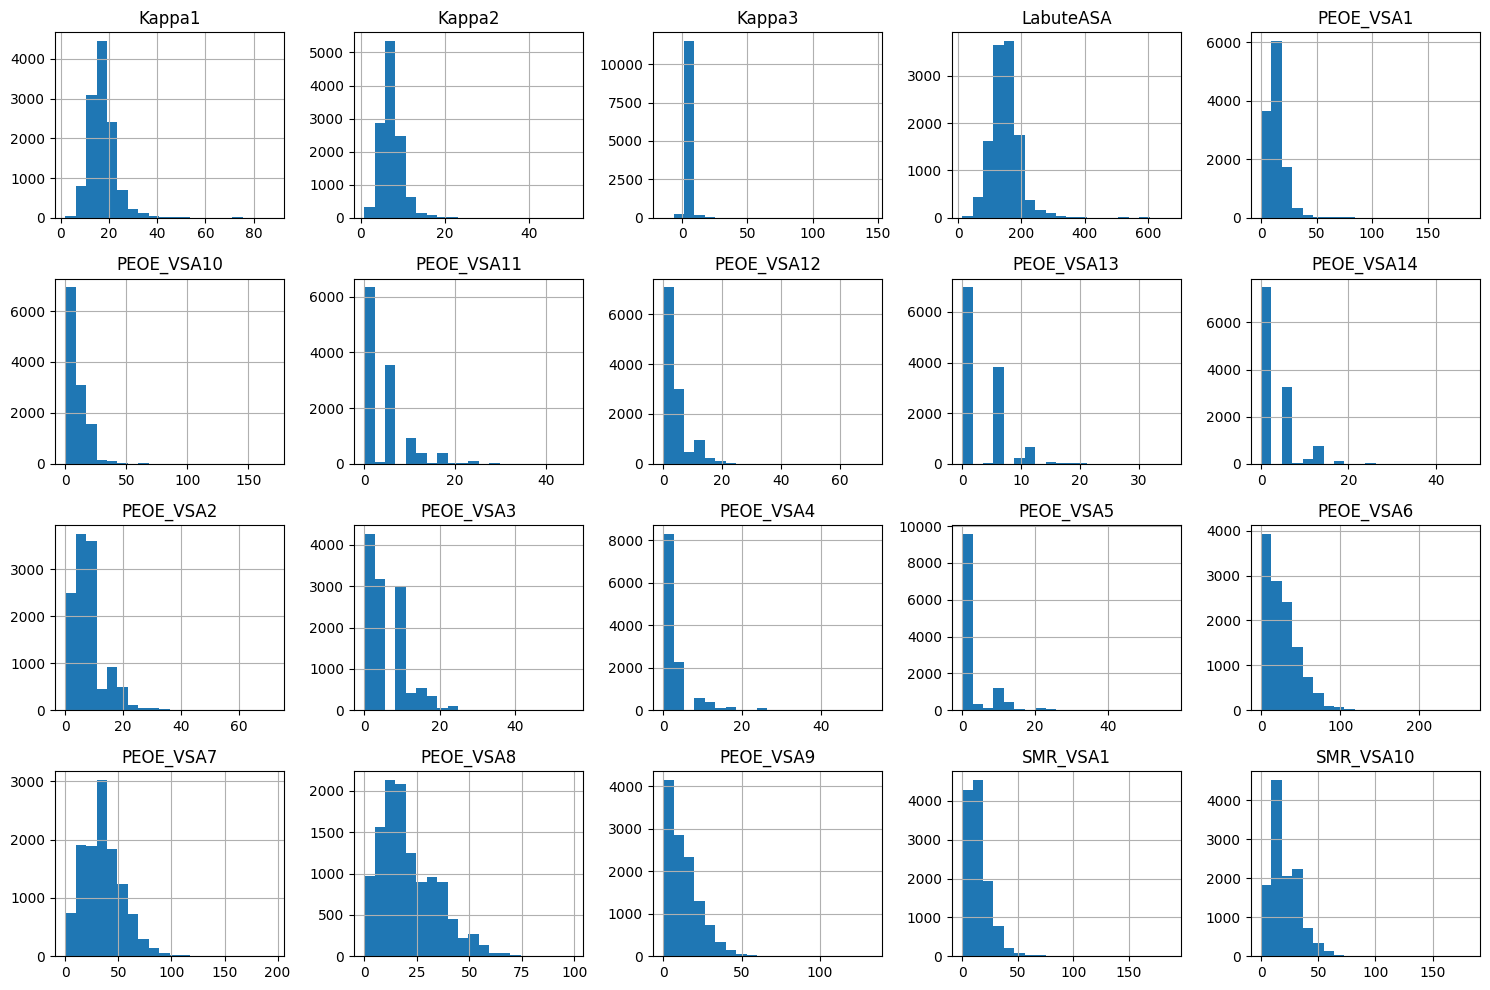

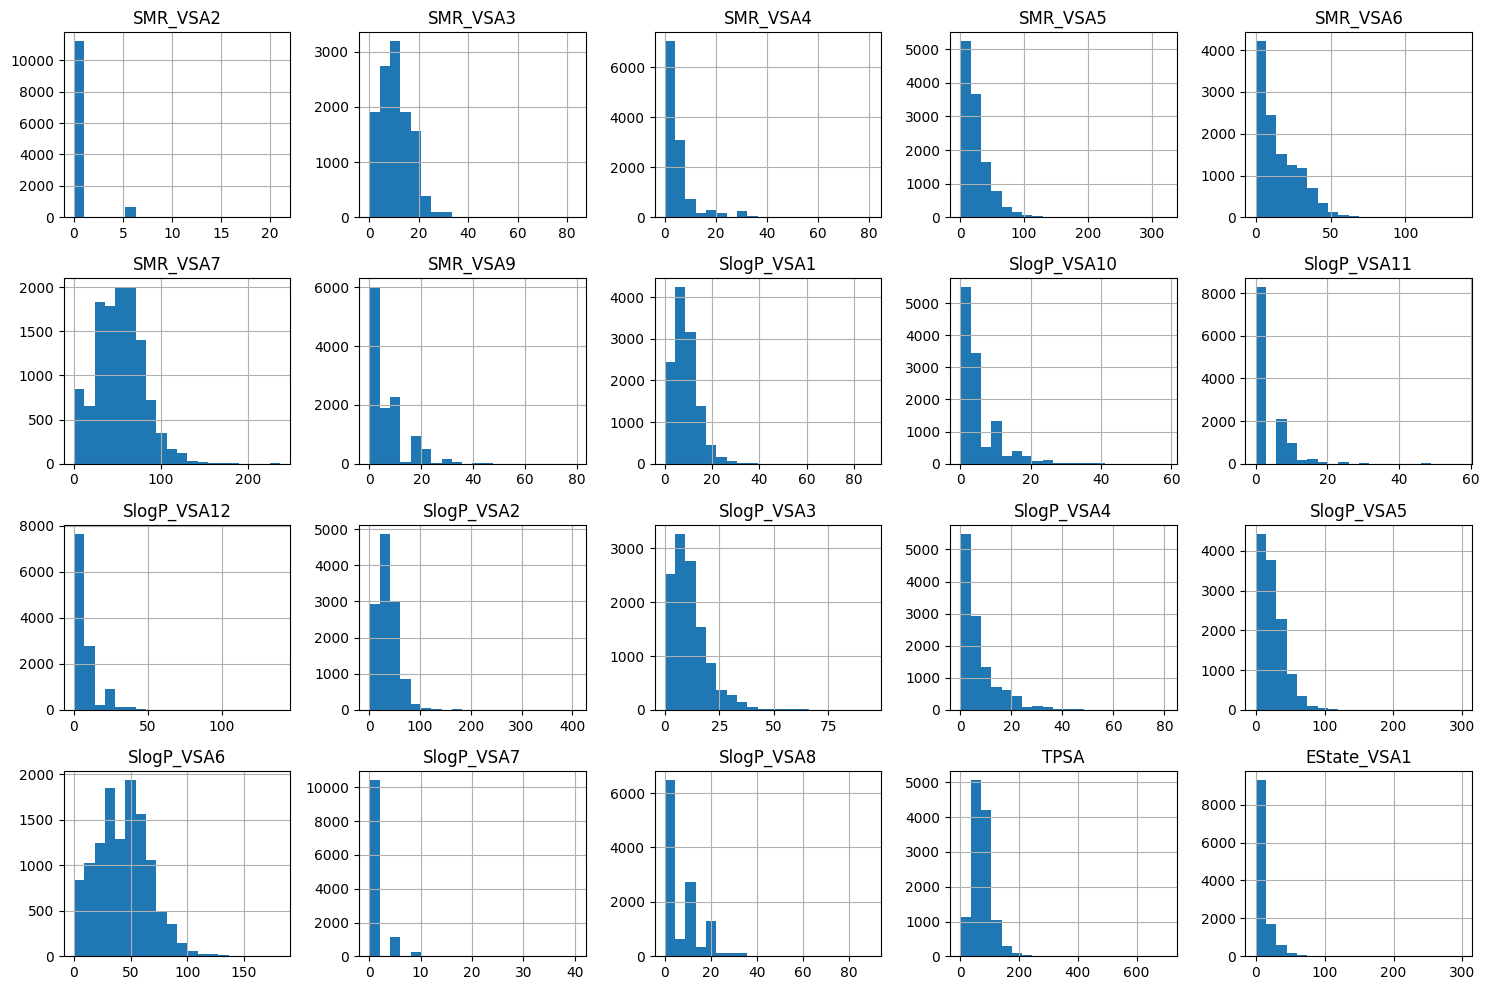

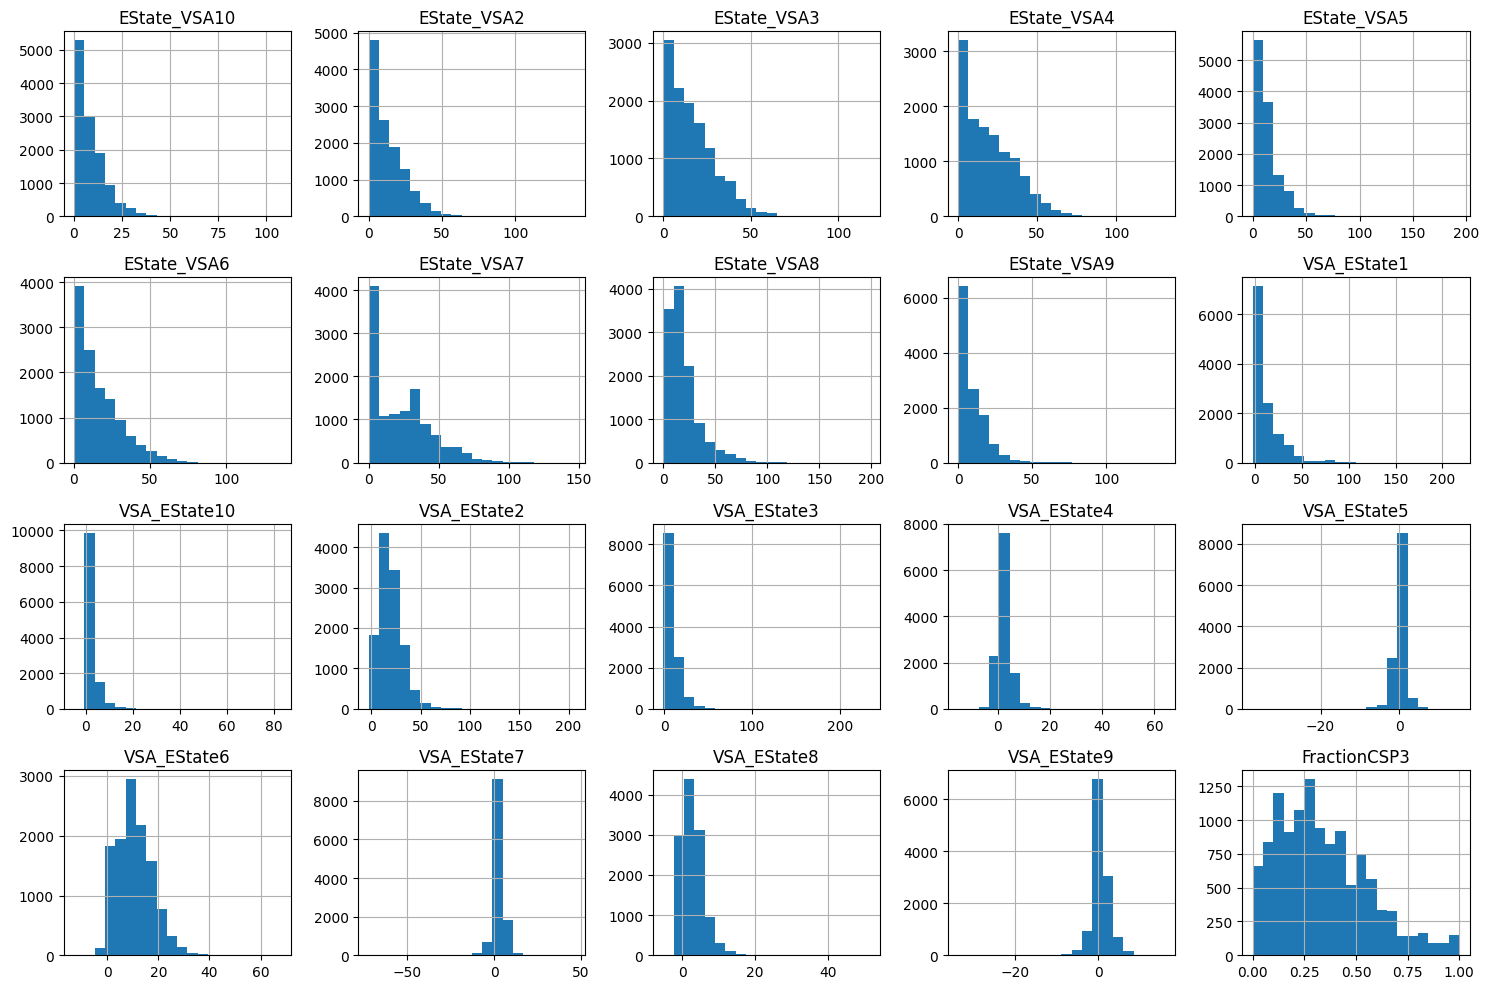

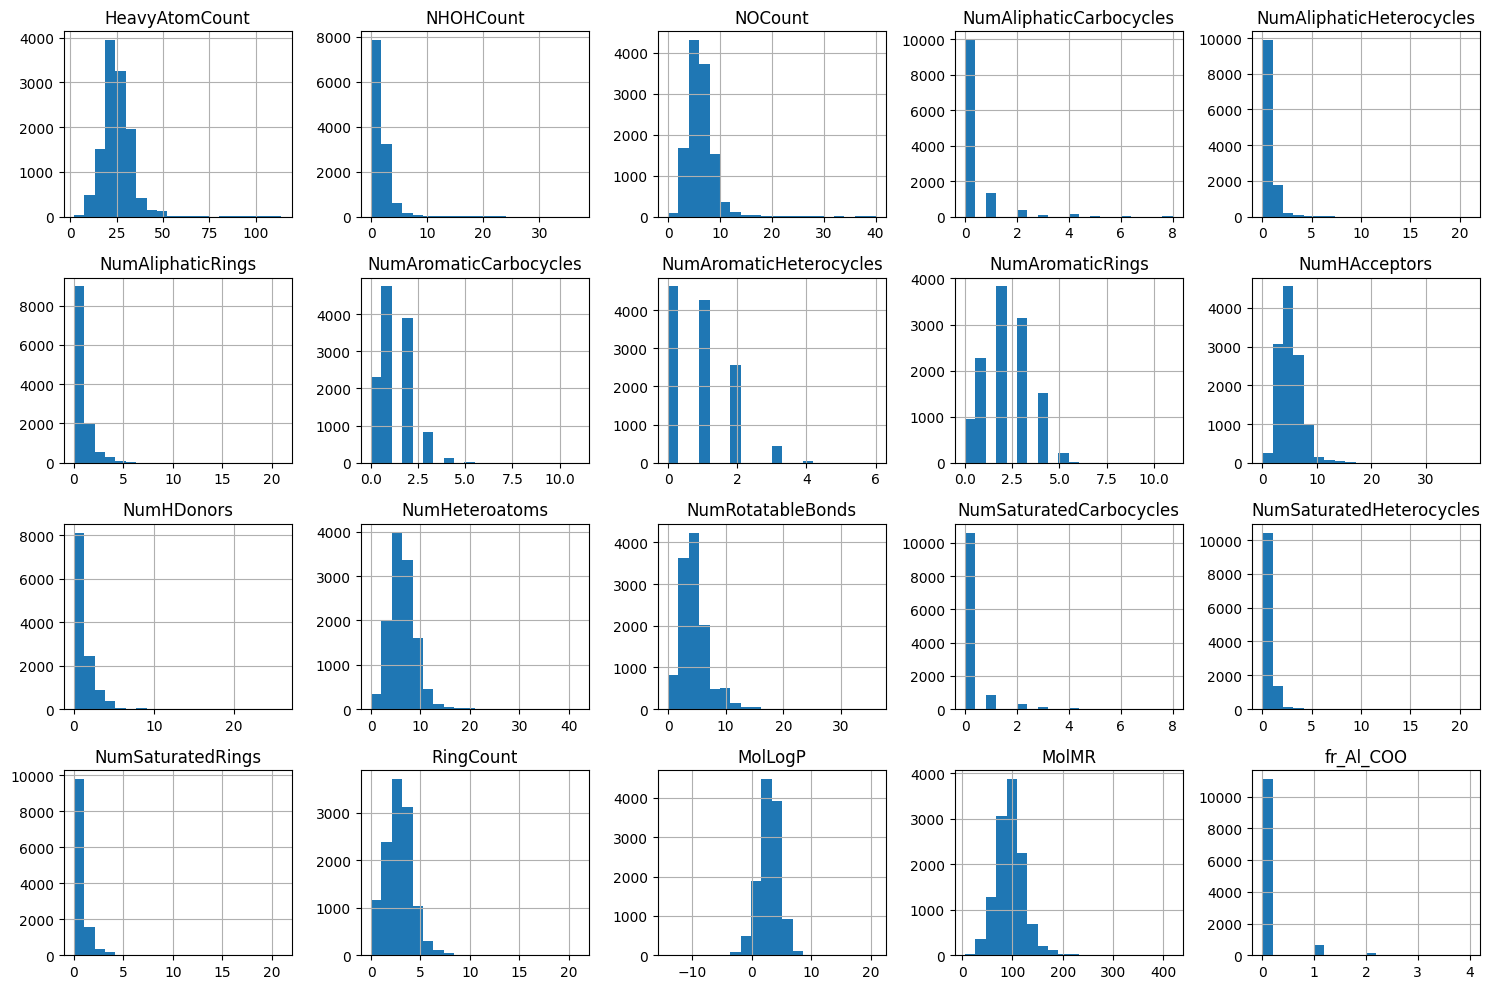

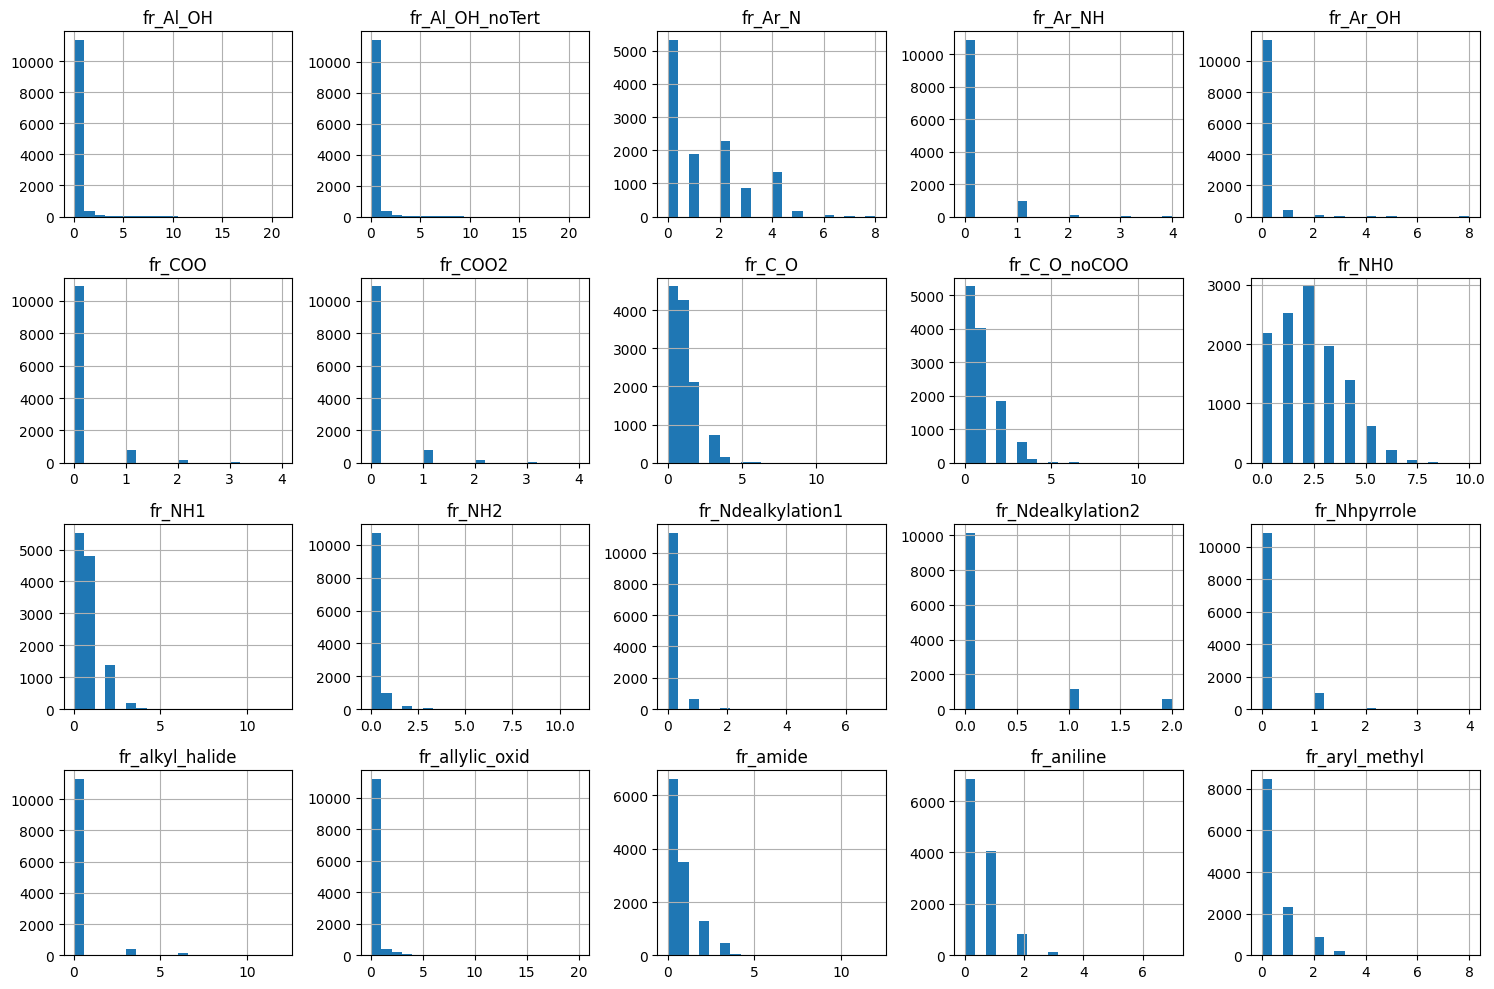

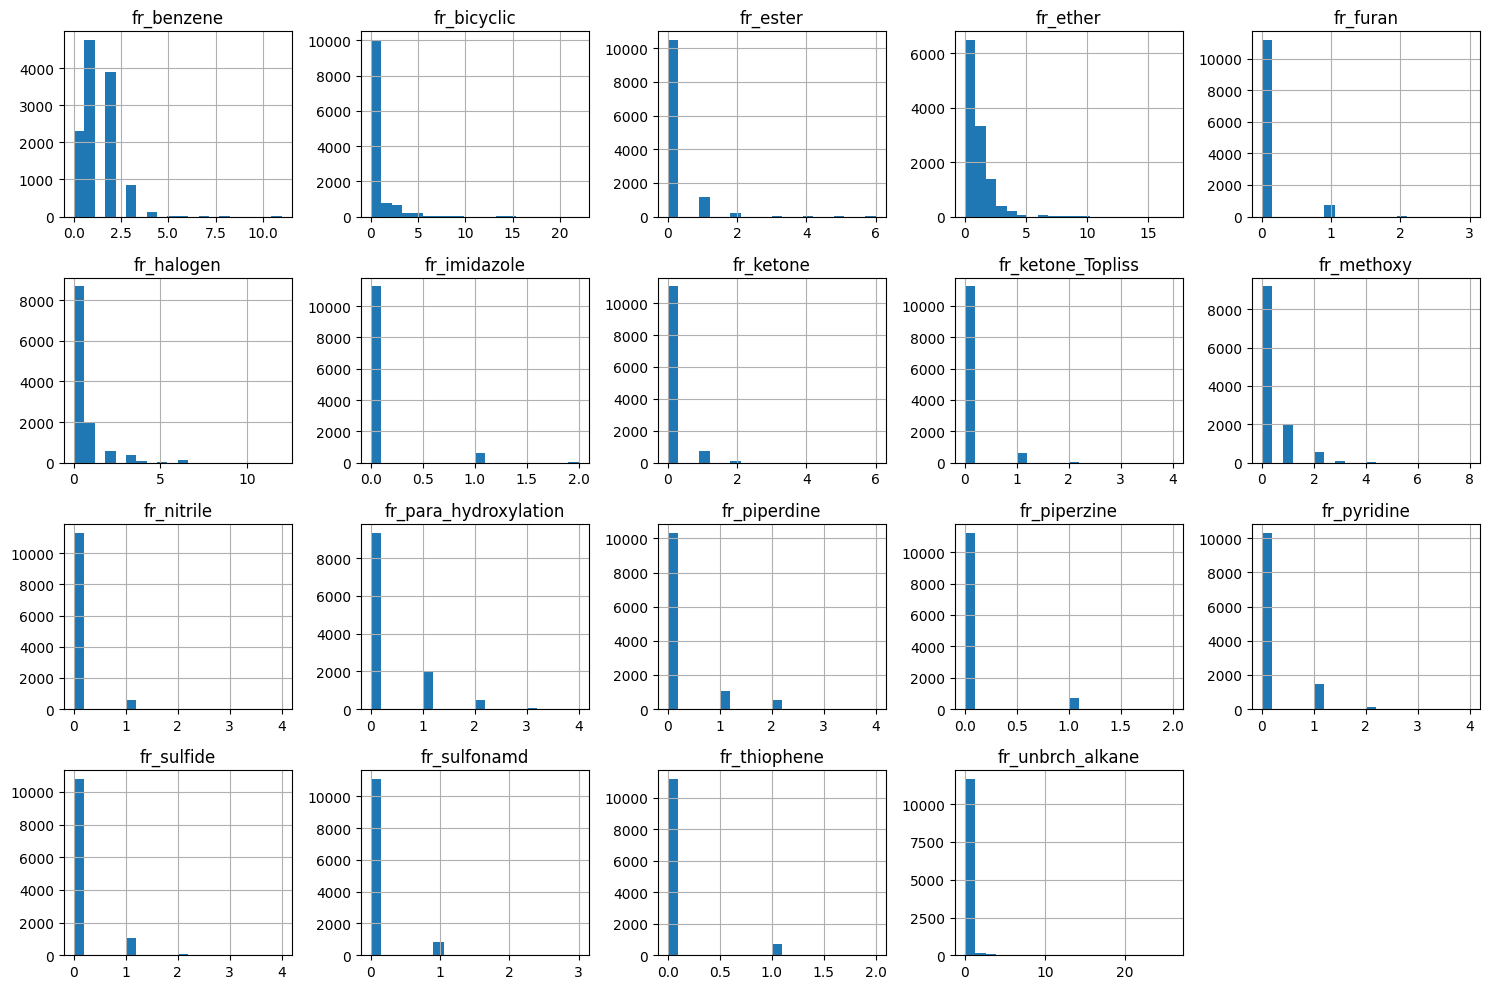

Total de colunas originais: 208
Colunas constantes removidas: 4
Colunas quase constantes removidas: 45
Colunas restantes para análise: 159


In [12]:
features_explo = features.copy()

# Remove colunas constantes (apenas 1 valor único)
constant_cols = features_explo.nunique()[features_explo.nunique() == 1].index
features_explo = features_explo.drop(columns=constant_cols)

# Remove colunas quase constantes
threshold = 0.95
almost_constant_cols = []

for col in features_explo.columns:
    most_frequent_ratio = features_explo[col].value_counts(normalize=True).max()
    if most_frequent_ratio > threshold:
        almost_constant_cols.append(col)

features_explo = features_explo.drop(columns=almost_constant_cols)

# Gera histogramas apenas com as colunas não constantes/quase constantes
n_vars = features_explo.shape[1]
vars_per_plot = 20
n_plots = math.ceil(n_vars / vars_per_plot)

for i in range(n_plots):
    start_col = i * vars_per_plot
    end_col = min((i + 1) * vars_per_plot, n_vars)
    features_explo.iloc[:, start_col:end_col].hist(figsize=(15, 10), bins=20, layout=(4, 5))
    plt.tight_layout()
    plt.show()

# Verifica quantas colunas foram removidas
print(f"Total de colunas originais: {features.shape[1]}")
print(f"Colunas constantes removidas: {len(constant_cols)}")
print(f"Colunas quase constantes removidas: {len(almost_constant_cols)}")
print(f"Colunas restantes para análise: {features_explo.shape[1]}")

#### Análise de Correlação entre as Features (Multicolinearidade)

De modo a verificar a colinearidade das diferentes variáveis (descritores químicos) no nosso dataset, decidimos criar um heatmap dos coeficientes de correlação. Isto permite-nos ter uma ideia inicial se faz sentido aplicar técnicas de redução de dimensionalidade, caso haja muitas variáveis correlacionadas entre si. Devido ao elevado número de variáveis, a visualização da matriz de correlação completa poderia ser um algo confusa. Portanto, decidimos usar agrupamento hierárquico (clustermap) na criação do heatmap, tornando os padrões de correlação mais visíveis e organizados, ao agrupar visualmente as features com relações semelhantes.


colunas com variância zero:
- NumRadicalElectrons
- SMR_VSA8
- SlogP_VSA9
- fr_prisulfonamd

Novas dimensões do DataFrame 'features' após remover colunas com variância zero: (11934, 204)

Matriz de correlação calculada com sucesso e livre de NaNs.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1200x1000 with 0 Axes>

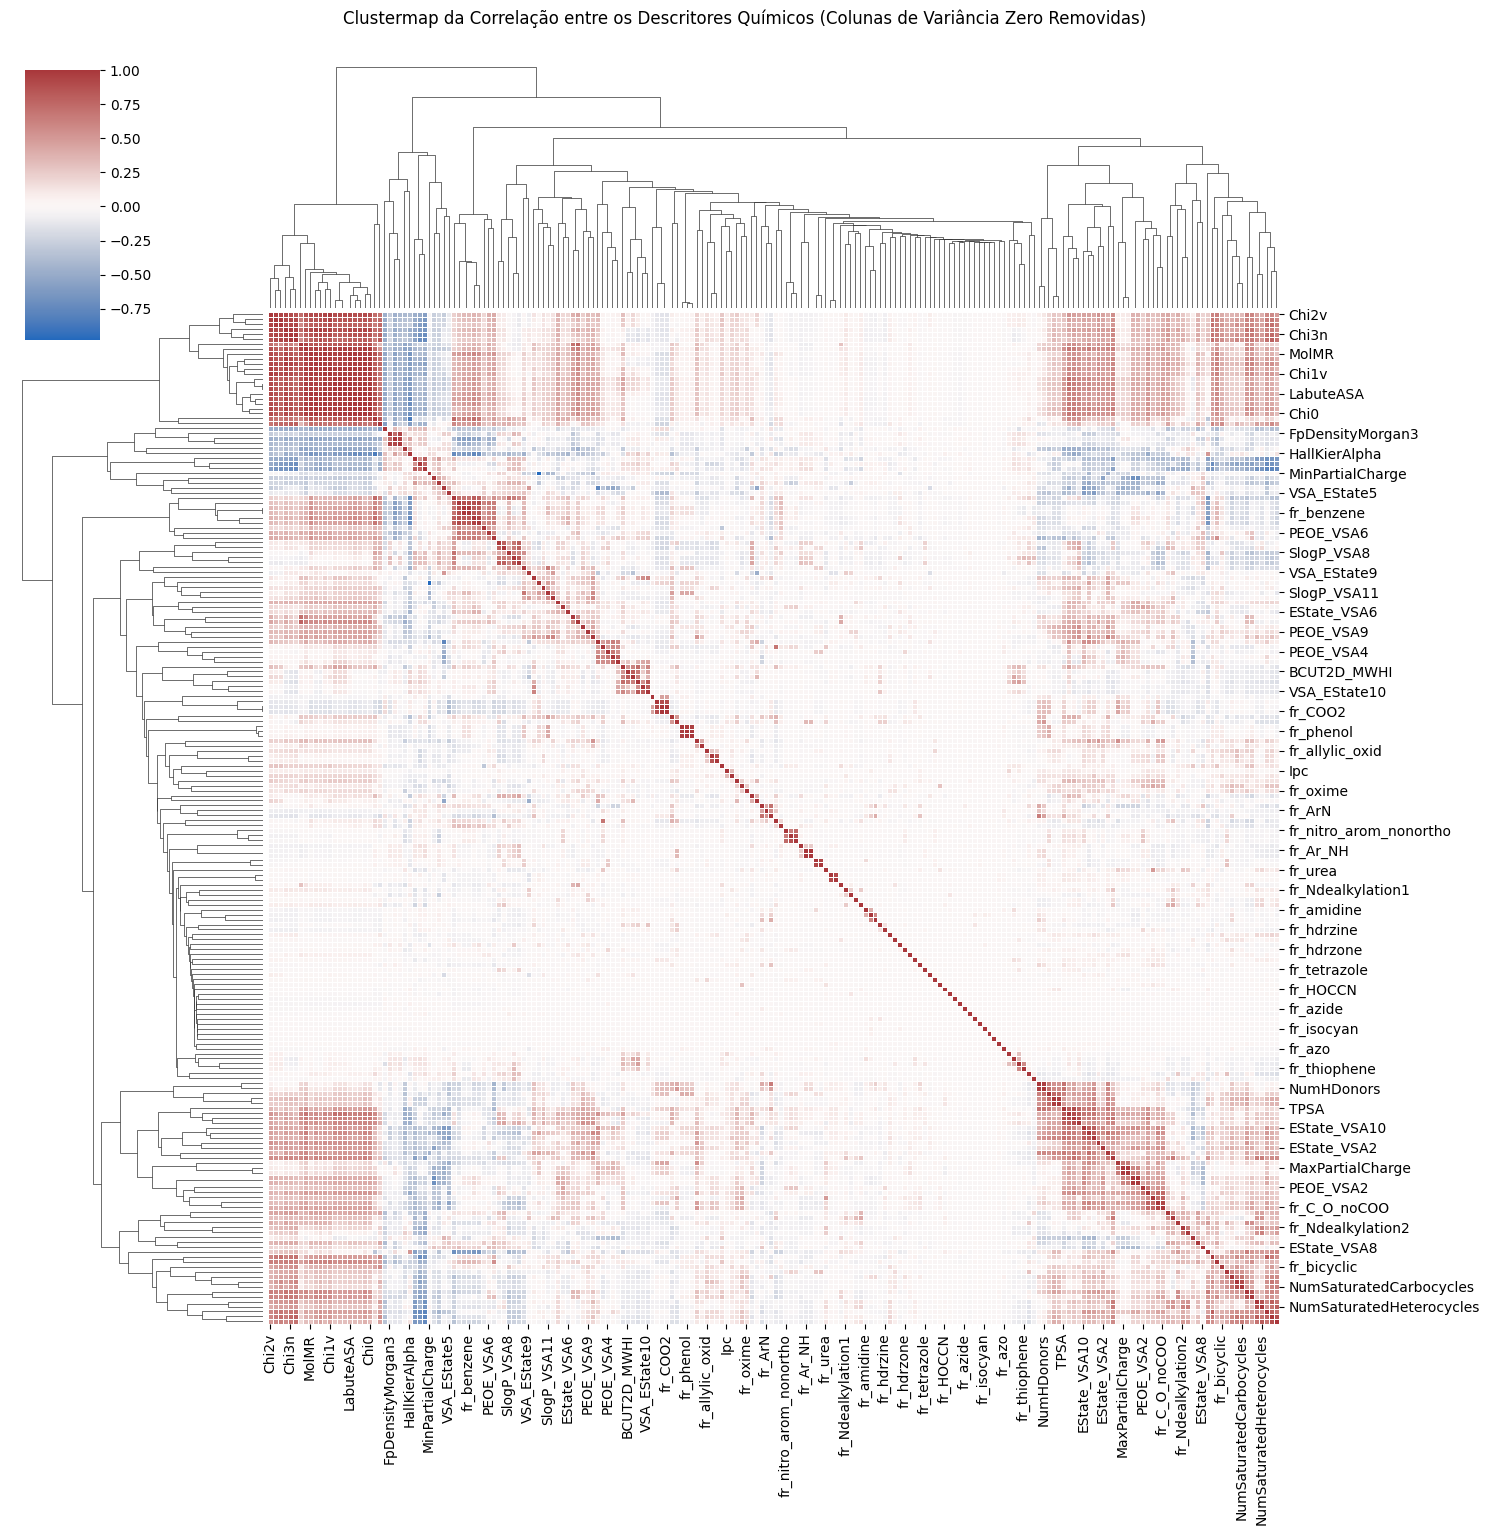

In [13]:
# Identificar colunas com variância zero
zero_variance_cols = features.columns[features.var() == 0]

if not zero_variance_cols.empty:
    print("colunas com variância zero:")
    for col in zero_variance_cols:
        print(f"- {col}")

    # Remover estas colunas da DataFrame 'features'
    features_filtered = features.drop(columns=zero_variance_cols)
    print(f"\nNovas dimensões do DataFrame 'features' após remover colunas com variância zero: {features_filtered.shape}")

    correlation_matrix_features = features_filtered.corr()

    print("\nMatriz de correlação calculada com sucesso e livre de NaNs.")


    plt.figure(figsize=(12, 10))
    sns.clustermap(correlation_matrix_features,
                    cmap='vlag',
                    annot=False,
                    fmt=".2f",
                    linewidths=.5,
                    figsize=(15, 15))
    plt.suptitle('Clustermap da Correlação entre os Descritores Químicos (Colunas de Variância Zero Removidas)', y=1.02)
    plt.show()

Através do heatmap, podemos verificar que existem de facto algumas variáveis bastante correlacionadas entre si. Isto é particularmente visível nos blocos de cores uniformes e intensas (vermelho ou azul) que se formam nos dendrogramas. Nota-se a presença de clusters de features fortemente correlacionadas, como é visível no canto superior esquerdo do heatmap, onde há um bloco significativo de correlações positivas fortes. Em menor medida, padrões de correlação também são observados no canto inferior esquerdo e direito.

Também é de notar algumas secções esparsas ao longo da diagonal (excluindo a diagonal principal, que é sempre 1) que apresentam uma correlação forte entre pares específicos de variáveis, indicando relações bidirecionais fortes que podem não pertencer aos maiores clusters.

Esta análise confirma que há multicolinearidade no dataset, o que valida a aplicação de técnicas de redução de dimensionalidade como a Análise de Componentes Principais (PCA) para simplificar o dataset e potencialmente melhorar o desempenho de alguns modelos de Machine Learning.

# Pré-processamento

In [14]:
# Separar X e y
X = features_filtered
y = labels["Y"]

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Análise multivariada não supervisionada

### PCA


--- PCA para Visualização (2 Componentes) ---
Variância explicada com 2 componentes: 24.49%


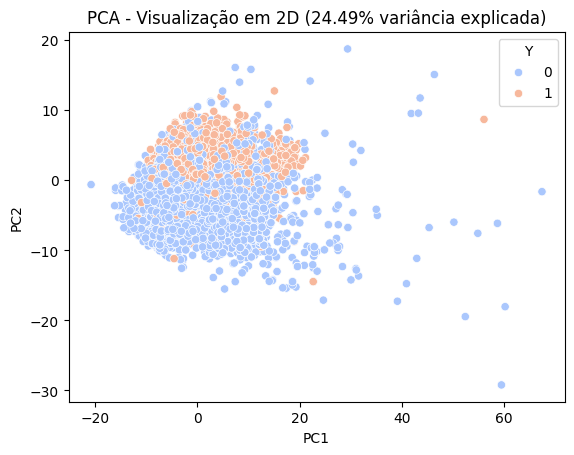

In [15]:
print("\n--- PCA para Visualização (2 Componentes) ---")
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Cálculo e exibição da variância explicada pelas 2 componentes para o texto
variance_explained_2d = pca_2d.explained_variance_ratio_.sum()
print(f"Variância explicada com 2 componentes: {variance_explained_2d:.2%}")

sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="coolwarm")
plt.title(f"PCA - Visualização em 2D ({variance_explained_2d:.2%} variância explicada)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Aplicámos a Análise de Componentes Principais (PCA) com n_components=2 para reduzir a dimensionalidade dos dados a duas dimensões, permitindo a sua visualização num gráfico bidimensional. Esta abordagem é particularmente útil para tentar identificar padrões visuais, como clusters ou separações entre as classes, no espaço de menor dimensão.

No entanto, é crucial notar que, com 2 componentes, apenas 24,49% dos dados é explicada. Isto significa que, embora a visualização possa revelar tendências gerais, grande parte da informação original dos descritores químicos não é retida. Consequentemente, esta visualização serve primariamente como uma ferramenta exploratória e não como uma representação completa dos dados.

In [16]:
print("\n--- PCA Otimizado para Retenção de Variância ---")
print("")
# 1. Aplicar PCA sem reduzir dimensões inicialmente para analisar a variância
pca_full = PCA().fit(X_scaled)  # X_scaled já está normalizado

# 2. Calcular variância acumulada
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# 3. Encontrar o número mínimo de componentes para >=80% de variância
n_components_80 = np.min(np.where(cumulative_variance >= 0.80)[0]) + 1
n_components_90 = np.min(np.where(cumulative_variance >= 0.90)[0]) + 1
n_components_95 = np.min(np.where(cumulative_variance >= 0.95)[0]) + 1
n_components_99 = np.min(np.where(cumulative_variance >= 0.99)[0]) + 1

print(f"Número mínimo de componentes para 80% de variância: {n_components_80}")
print(f"Variância acumulada com {n_components_80} componentes: {cumulative_variance[n_components_80 - 1]:.2%}")
print("")
print(f"Número mínimo de componentes para 90% de variância: {n_components_90}")
print(f"Variância acumulada com {n_components_90} componentes: {cumulative_variance[n_components_90 - 1]:.2%}")
print("")
print(f"Número mínimo de componentes para 95% de variância: {n_components_95}")
print(f"Variância acumulada com {n_components_95} componentes: {cumulative_variance[n_components_95 - 1]:.2%}")

# 4. Re-aplicar PCA com o número ótimo de componentes
pca_optimized_80 = PCA(n_components=n_components_80)
X_pca_optimized_80 = pca_optimized_80.fit_transform(X_scaled)

pca_optimized_90 = PCA(n_components=n_components_90)
X_pca_optimized_90 = pca_optimized_90.fit_transform(X_scaled)

pca_optimized_95 = PCA(n_components=n_components_95)
X_pca_optimized_95 = pca_optimized_95.fit_transform(X_scaled)


--- PCA Otimizado para Retenção de Variância ---

Número mínimo de componentes para 80% de variância: 48
Variância acumulada com 48 componentes: 80.21%

Número mínimo de componentes para 90% de variância: 70
Variância acumulada com 70 componentes: 90.14%

Número mínimo de componentes para 95% de variância: 87
Variância acumulada com 87 componentes: 95.12%




Reavaliámos o PCA com o objetivo de reter uma percentagem significativa da variância total dos dados, o que é crucial se o PCA for utilizado como uma etapa de pré-processamento para alimentar os modelos de Machine Learning. Ao invés de limitar arbitrariamente o número de componentes, identificámos o número mínimo de componentes necessárias para explicar diferentes limiares de variância acumulada.

Para reter 80% da variância, são necessárias 48 componentes principais, explicando 80,21% da variabilidade total do dataset. Se o objetivo for alcançar 90% da variância, o número de componentes aumenta para 70, cobrindo 90,14% da variabilidade. Caso se pretenda capturar 95% da variância, são necessários 87 componentes principais, os quais explicam 95,12% da variabilidade.

Estes resultados contrastam fortemente com a visualização em 2D, onde as duas primeiras componentes principais explicam apenas 24,49% da variância. Isso destaca que a informação útil para descrever o dataset está amplamente distribuída por muitas dimensões, e não concentrada em poucas.

Embora um maior número de componentes não permita uma visualização direta em 2D, esta abordagem de PCA é mais apropriada como uma etapa de pré-processamento para os modelos de Machine Learning. O objetivo é reduzir o ruído e a multicolinearidade, mantendo a maior parte da informação original e diminuindo a complexidade computacional, ao mesmo tempo que se preserva a capacidade preditiva dos dados.

# t-SNE

Para complementar a análise de dimensionalidade aplicámos o t-SNE (t-distributed Stochastic Neighbor Embedding), este método permite-nos investigar a estrutura intrínseca dos dados em relação às classes da variável alvo ('target') e explorar visualmente padrões nos dados e agrupamentos em clusters.

Com o intuito de avaliar o impacto do parâmetro `perplexity` nos agrupamentos visuais (mantendo `n_components=2` e `random_state=42` para reprodutibilidade), decidimos experimentar com quatro valores: 30, 40, 50 e 60. Dado que o nosso dataset possui mais de 1000 linhas, seria de esperar que valores de `perplexity` mais altos (próximos de 50) pudessem resultar numa melhor separação dos grupos, ao dar mais atenção à estrutura global dos dados.

Processando perplexity = 30...
Silhouette Score: 0.0241
Processando perplexity = 40...
Silhouette Score: 0.0259
Processando perplexity = 50...
Silhouette Score: 0.0280
Processando perplexity = 60...
Silhouette Score: 0.0228


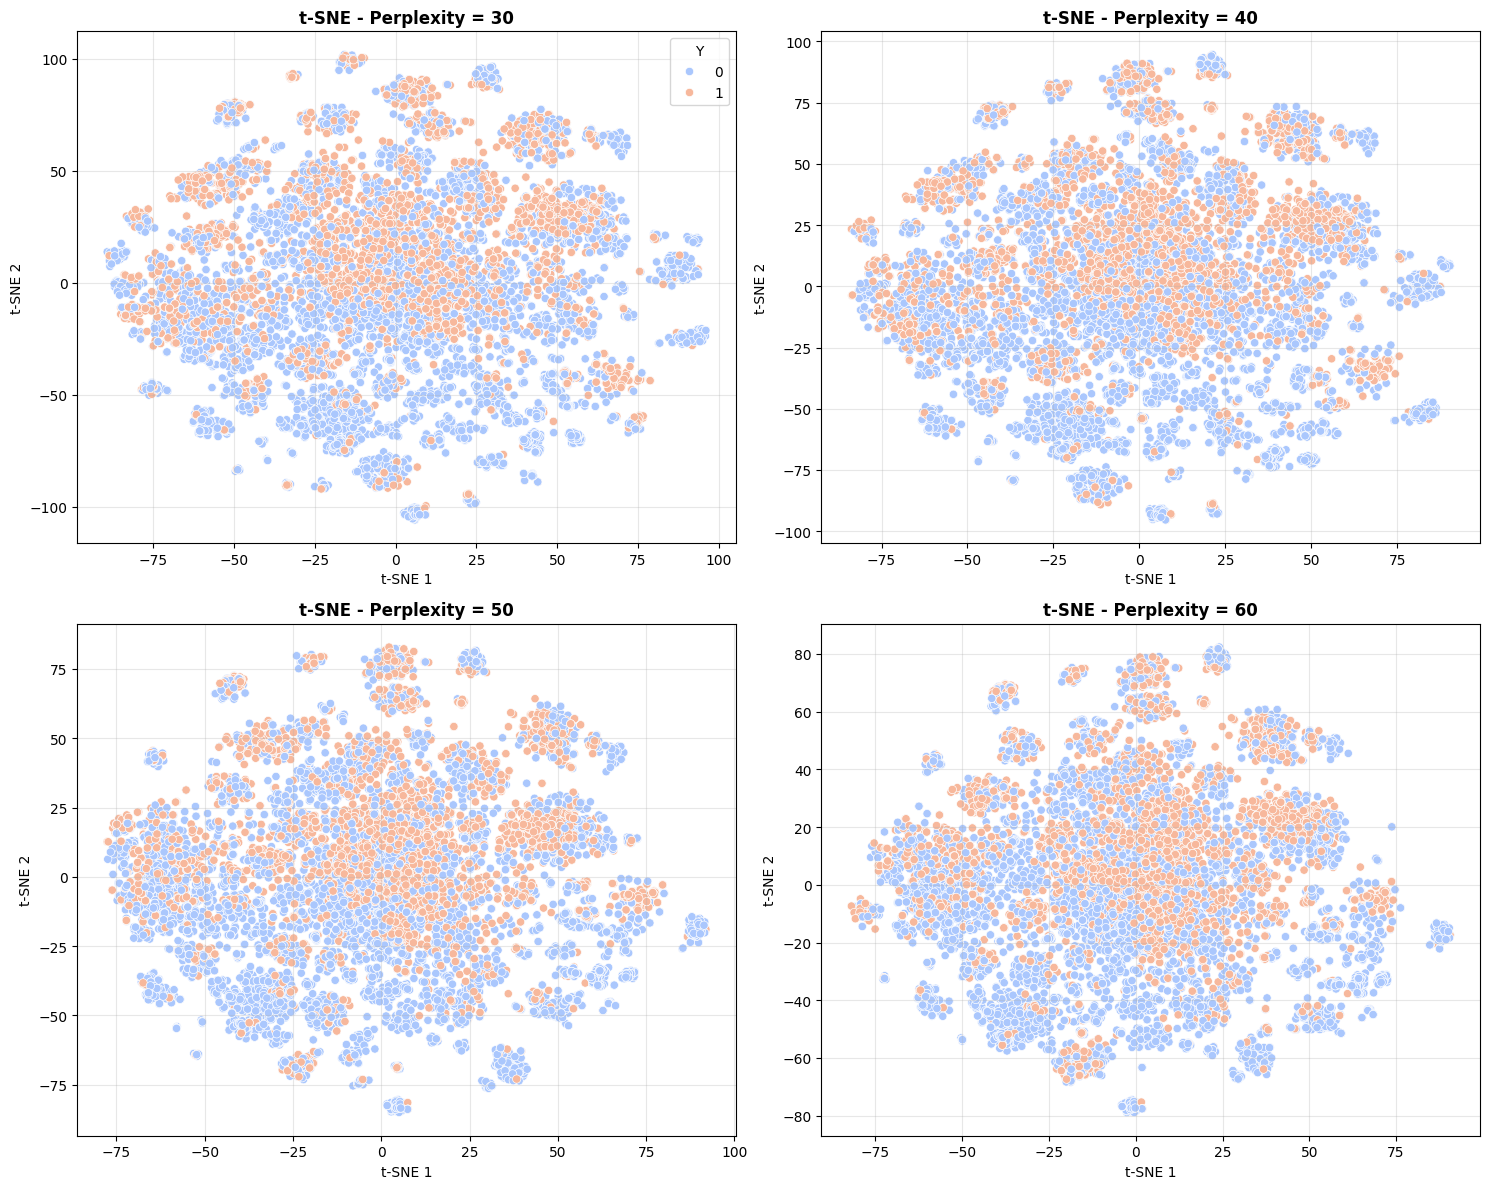

In [17]:
# Lista de valores de perplexity
l = [30, 40, 50, 60]

# Criar figura com subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()  # Converter para array 1D para facilitar iteração

# Loop pelos valores de perplexity
for i, perplexity in enumerate(l):
    print(f"Processando perplexity = {perplexity}...")

    # Aplicar t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    if len(np.unique(y)) > 1: # Garante que há mais de uma classe/grupo para avaliar
      silhouette_avg = silhouette_score(X_tsne, y)
      print(f"Silhouette Score: {silhouette_avg:.4f}")


    # Plotar no subplot correspondente
    sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y,
                   palette="coolwarm", ax=axes[i], legend=(i==0))

    # Configurar título e labels
    axes[i].set_title(f"t-SNE - Perplexity = {perplexity}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel('t-SNE 1')
    axes[i].set_ylabel('t-SNE 2')
    axes[i].grid(True, alpha=0.3)

# Ajustar layout
plt.tight_layout()


# Mostrar o gráfico
plt.show()

Ao analisar os gráficos obtidos para cada valor de `perplexity`, podemos constatar que não existe uma separação clara e visualmente distinta entre os grupos. A variação do parâmetro `perplexity` não teve um efeito dramaticamente diferente na separação visual dos grupos, uma vez que os quatro gráficos parecem bastante semelhantes. No entanto, observámos que os valores de `perplexity=40` e `perplexity=50` parecem ter resultado numa organização espacial ligeiramente mais coesa dos grupos, ainda que esta diferença seja subtil.

Para quantificar estas observações visuais e fornecer uma avaliação objetiva da qualidade da separação, calculámos o Silhouette Score para cada configuração de `perplexity`:

* Silhouette Score (perplexity = 30): 0.0241
* Silhouette Score (perplexity = 40): 0.0267
* Silhouette Score (perplexity = 50): 0.0275
* Silhouette Score (perplexity = 60): 0.0227

Estes resultados numéricos corroboram fortemente a observação visual. Todos os valores de Silhouette Score são extremamente baixos e próximos de zero. o que indica que as amostras estão muito próximas ou sobrepostas à fronteira de decisão entre os clusters. Isso sugere que os clusters não estão bem separados e que há uma sobreposição significativa entre as classes no espaço bidimensional do t-SNE.

Os valores ligeiramente mais altos obtidos para `perplexity=50` (0.0275) e `perplexity=40` (0.0267) validam a perceção visual de que estas configurações produziram um agrupamento marginalmente melhor, mas ainda assim insuficiente para uma clara e robusta separação das classes.

Estes resultados significam que, apesar dos esforços em otimizar o parâmetro `perplexity`, o t-SNE (na sua projeção em 2 dimensões) não consegue discernir uma separação clara e bem definida entre as classes de compostos inibidores e não-inibidores. Isso sugere que os grupos de dados são altamente misturados no espaço de alta dimensão, ou que a complexidade da sua relação não pode ser linear ou não-linearmente separada de forma evidente num espaço bidimensional de forma trivial. Isto implica que a inibição da CYP2C9 é um problema com uma fronteira de decisão inerentemente complexa e não trivialmente separável por uma visualização em baixa dimensão, o que pode justificar a necessidade de modelos de classificação mais sofisticados no espaço de alta dimensão.

### Clustering

Executamos clustering para explorar a estrutura intrínseca e os padrões naturais presentes nos dados, sem recorrer aos rótulos pré-definidos da variável alvo (target). Dado que as análises de redução de dimensionalidade (PCA e t-SNE) não revelaram uma separação clara e visível entre as classes de compostos inibidores e não-inibidores, o clustering não supervisionado torna-se uma ferramenta crucial. O objetivo é determinar se os dados formam agrupamentos inerentes que possam, de alguma forma, corresponder ou fornecer insights sobre as classes, ou se a sua distribuição é mais contínua e complexa.

Para este fim, explorámos dois algoritmos de clustering distintos, o K-means e o Clustering Hierárquico endo que para este último testamos várias distâncias (Distância Euclidiana com Ligação Ward, Distância Manhattan com Ligação Average e Distância Cosseno com Ligação Complete.

Com esta abordagem, procurámos identificar se alguma destas configurações de clustering conseguiria discernir agrupamentos naturais nos dados que pudessem revelar a sua organização, complementando as observações obtidas com as técnicas de redução de dimensionalidade.


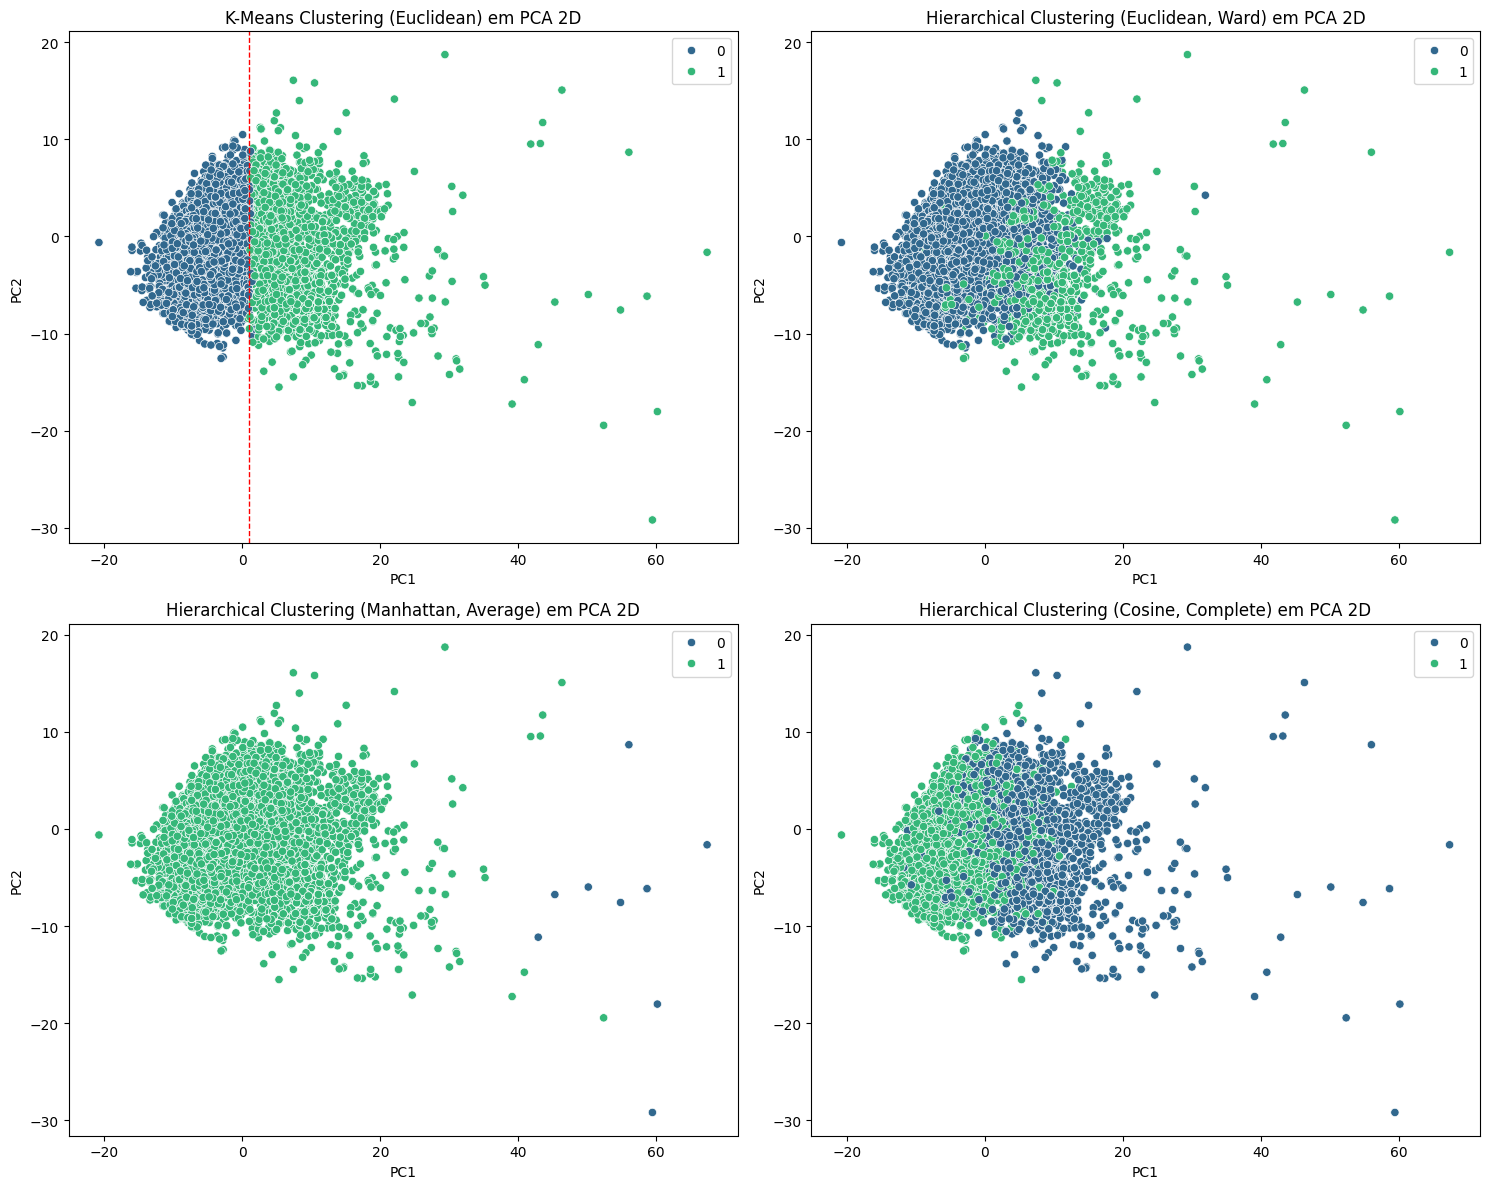

In [18]:
# Criar figura com 4 subplots em mosaico 2x2
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# --- 1. K-Means ---
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
clusters_kmeans = kmeans.fit_predict(X_scaled)
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=clusters_kmeans,
                palette='viridis', legend='full', ax=axes[0, 0])
axes[0, 0].set_title('K-Means Clustering (Euclidean) em PCA 2D')
axes[0, 0].set_xlabel("PC1")
axes[0, 0].set_ylabel("PC2")
axes[0, 0].axvline(x=1, color='red', linestyle='--', linewidth=1)

# --- 2. Clustering Hierárquico: Distância Euclidiana, Ligação Ward ---
agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward', metric='euclidean')
clusters_agg_ward = agg_ward.fit_predict(X_scaled)
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=clusters_agg_ward,
                palette='viridis', legend='full', ax=axes[0, 1])
axes[0, 1].set_title('Hierarchical Clustering (Euclidean, Ward) em PCA 2D')
axes[0, 1].set_xlabel("PC1")
axes[0, 1].set_ylabel("PC2")

# --- 3. Clustering Hierárquico: Distância Manhattan, Ligação Average ---
agg_manhattan_avg = AgglomerativeClustering(n_clusters=2, linkage='average', metric='manhattan')
clusters_agg_manhattan_avg = agg_manhattan_avg.fit_predict(X_scaled)
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=clusters_agg_manhattan_avg,
                palette='viridis', legend='full', ax=axes[1, 0])
axes[1, 0].set_title('Hierarchical Clustering (Manhattan, Average) em PCA 2D')
axes[1, 0].set_xlabel("PC1")
axes[1, 0].set_ylabel("PC2")

# --- 4. Clustering Hierárquico: Distância Cosseno, Ligação Complete ---
agg_cosine_complete = AgglomerativeClustering(n_clusters=2, linkage='complete', metric='cosine')
clusters_agg_cosine_complete = agg_cosine_complete.fit_predict(X_scaled)
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=clusters_agg_cosine_complete,
                palette='viridis', legend='full', ax=axes[1, 1])
axes[1, 1].set_title('Hierarchical Clustering (Cosine, Complete) em PCA 2D')
axes[1, 1].set_xlabel("PC1")
axes[1, 1].set_ylabel("PC2")

# Ajustar espaçamento entre os gráficos
plt.tight_layout()
plt.show()

Através dos gráficos obtidos para os diferentes métodos de clustering, podemos constatar que a separação visual entre os grupos formados é, de forma geral, muito limitada em todas as configurações testadas.

No caso do K-Means Clustering (Euclidean), que visualmente apresentou o padrão de agrupamento mais discernível em comparação com os métodos hierárquicos, observamos que um dos clusters (identificado como Cluster 0) se agrupa predominantemente à esquerda da linha x=1, enquanto o outro (Cluster 1) se concentra mais à direita. No entanto, esta separação visual não representa uma boa distância entre os grupos, estando os clusters praticamente colados um ao outro e apresentando alguma sobreposição perto da linha x=1.

Os métodos de Clustering Hierárquico, embora utilizando diferentes métricas de distância (Euclidiana, Manhattan, Cosseno) e métodos de ligação (Ward, Average, Complete), apresentaram resultados visuais desfavoráveis e de uma forma geral inferiores aos resultados obtidos pelo K-Means.

Estes resultados de clustering reforçam as conclusões tiradas das análises de redução de dimensionalidade (PCA e t-SNE): o dataset apresenta uma complexidade intrínseca elevada, onde as classes de compostos inibidores e não-inibidores são altamente misturadas no espaço de alta dimensão e não se agrupam de forma clara ou discernível em baixa dimensão, seja através de projeções ou de algoritmos de clustering não supervisionado.

# Machine Learning

## Divisão dos dados

Para garantir uma avaliação justa dos modelos, os dados foram divididos em conjuntos de treino e teste utilizando a função `train_test_split`, com 20% dos dados reservados para teste. Esta divisão foi estratificada de forma a preservar a proporção original das classes no conjunto de teste, minimizando o risco de enviesamento em datasets desbalanceados.

Além disso, foram gerados quatro conjuntos distintos de treino/teste:
- Um conjunto apenas normalizado (`X_scaled`), mantendo todas as features originais;
- Três conjuntos reduzidos via PCA, com diferentes níveis de retenção de variância (80%, 90% e 95%).

Este procedimento permite comparar o desempenho dos modelos em diferentes representações do espaço dos dados, avaliando o impacto da redução de dimensionalidade na capacidade preditiva.

In [19]:
# Separar treino e teste para os dados originais escalados
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

# Separar treino e teste para os dados PCA com 80% de variância
X_train_80, X_test_80 = train_test_split(X_pca_optimized_80, test_size=0.2, random_state=42, stratify=y)

# Separar treino e teste para os dados PCA com 90% de variância
X_train_90, X_test_90 = train_test_split(X_pca_optimized_90, test_size=0.2, random_state=42, stratify=y)

# Separar treino e teste para os dados PCA com 95% de variância
X_train_95, X_test_95 = train_test_split(X_pca_optimized_95, test_size=0.2, random_state=42, stratify=y)

print("Dados de treino e teste preparados para X_scaled, X_pca_optimized_80, X_pca_optimized_90 e X_pca_optimized_95.")

Dados de treino e teste preparados para X_scaled, X_pca_optimized_80, X_pca_optimized_90 e X_pca_optimized_95.


## Otimização de Hiperparâmetros

Para melhorar o desempenho dos modelos, foi realizada a otimização dos seus hiperparâmetros utilizando a técnica `RandomizedSearchCV`, combinada com validação cruzada estratificada (`StratifiedKFold`). Esta abordagem permite encontrar configurações mais adequadas para cada algoritmo, testando um subconjunto representativo de combinações possíveis de parâmetros.

Foram otimizados os seguintes classificadores:

- **RandomForestClassifier**: parâmetros como o número de árvores (`n_estimators`), profundidade máxima (`max_depth`), número mínimo de amostras por folha (`min_samples_leaf`) e o número de features consideradas por split (`max_features`) foram testados.
- **SVC (Support Vector Classifier)**: variaram-se o tipo de `kernel`, a regularização (`C`), `gamma` e o parâmetro `class_weight`, sendo este último essencial para lidar com o desbalanceamento das classes.
- **SGDClassifier**: testaram-se diferentes funções de perda (`loss`), penalizações (`penalty`), taxa de regularização (`alpha`) e número máximo de iterações.
- **KNeighborsClassifier**: exploraram-se diferentes valores de `n_neighbors`, pesos, algoritmos de vizinhança e métricas de distância.
- **DecisionTreeClassifier**: utilizou-se a mesma grelha de parâmetros da Random Forest (exceto `n_estimators`).

A métrica utilizada para otimização foi o **AUC (Area Under the Curve ROC)**, apropriada para problemas de classificação binária com desequilíbrio entre classes.

Além disso, garantiu-se a **reprodutibilidade** com `random_state=42`, e a utilização de `class_weight='balanced'` sempre que suportado pelos modelos, para mitigar o enviesamento em favor da classe maioritária.


In [21]:
print("\n--- Otimização de Hiperparâmetros para Random Forest ---")

# Definir a grelha de parâmetros para Random Forest
tree_based_hyperparameters = {
    'n_estimators': [*range(100, 500, 50)],  # Número de árvores
    'max_features': ['sqrt', 'log2'],  # Número de features a considerar em cada split
    'max_depth': [3, 5, 7],  # Profundidade máxima da árvore
    'min_samples_split': [*range(2, 11)],  # Mínimo de amostras para fazer um split
    'min_samples_leaf': [*range(2, 6)],  # Mínimo de amostras numa folha
    'random_state': [42]  # Para reprodutibilidade
}

svm_hyperparameters = {
    'C': [0.1, 1, 10, 100],  # Parâmetro de regularização
    'kernel': ['sigmoid', 'rbf', 'poly'],  # Tipos de kernel
    'gamma': ['scale', 'auto'],  # Parâmetro de kernel
    'probability': [True],  # Para calcular probabilidades
    'class_weight': ['balanced'],  # Para lidar com classes desbalanceadas
    'max_iter': [*range(1000, 2500, 250)],  # Número máximo de iterações
    'random_state': [42]  # Para reprodutibilidade
}

sgd_hyperparameters = {
    'loss': ['modified_huber', 'squared_hinge'],  # Função de perda
    'penalty': ['l2', 'l1', 'elasticnet'],  # Tipo de penalização
    'alpha': [0.0001, 0.001, 0.01],  # Taxa de regularização
    'max_iter': [*range(1000, 2500, 250)],  # Número máximo de iterações
    'random_state': [42]  # Para reprodutibilidade
}

knn_hyperparameters = {
    'n_neighbors': [3, 5, 7, 9],  # Número de vizinhos
    'weights': ['uniform', 'distance'],  # Pesos dos vizinhos
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritmo para encontrar vizinhos
    'leaf_size': [30, 40, 50],  # Tamanho da folha para algoritmos baseados em árvore
    'p': [1, 2],  # Parâmetro de distância (1 = Manhattan, 2 = Euclidiana)
}

# Criar a instância de GridSearchCV
# cv=5 significa 5-fold cross-validation
# scoring='roc_auc' é uma boa métrica para classificação binária desequilibrada

models_params = [("RandomForestClassifier", RandomForestClassifier(), tree_based_hyperparameters),
                 ("DecisionTreeClassifier", DecisionTreeClassifier(), tree_based_hyperparameters),
                 ("SVC", SVC(), svm_hyperparameters),
                 ("SGDClassifier", SGDClassifier(), sgd_hyperparameters),
                 ("KNeighborsClassifier", KNeighborsClassifier(), knn_hyperparameters)
]

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model_performance = {}

for model_name, model, params in models_params:
    print(f"\n--- Otimizando {model_name} ---")

    # Criar uma cópia dos parâmetros para evitar modificação in-place
    current_params = params.copy()

    if model_name == "DecisionTreeClassifier" and 'n_estimators' in current_params:
        del current_params['n_estimators'] # Decision Tree não usa n_estimators

    # Dicionário para guardar os resultados deste modelo para cada tipo de dados
    model_performance[model_name] = {}

    # Iterar sobre os diferentes conjuntos de dados
    datasets = {
        "scaled": (X_train, X_test),
        "pca_80": (X_train_80, X_test_80),
        "pca_90": (X_train_90, X_test_90),
        "pca_95": (X_train_95, X_test_95)
    }

    for dataset_name, (X_train_data, X_test_data) in datasets.items():
        print(f"\n--- Otimizando {model_name} em {dataset_name} data ---")

        # Criar uma NOVA instância de RandomizedSearchCV para cada conjunto de dados
        # e usar uma CÓPIA dos parâmetros para garantir que não há interferência
        grid_search_current = RandomizedSearchCV(model, current_params, n_iter=10, scoring='roc_auc',
                                                 cv=stratified_kfold, n_jobs=-1, verbose=1, random_state=42)

        # Ajustar o GridSearchCV aos dados de treino específicos
        grid_search_current.fit(X_train_data, y_train) # y_train é o mesmo para todos

        # Imprimir os melhores parâmetros e a melhor pontuação para o conjunto de dados atual
        print(f"Melhores parâmetros para {model_name} ({dataset_name}): {grid_search_current.best_params_}")
        print(f"Melhor pontuação (AUC) para {model_name} ({dataset_name}): {grid_search_current.best_score_:.4f}")

        # Obter o melhor modelo
        best_model = grid_search_current.best_estimator_

        # Avaliar o melhor modelo no conjunto de teste
        y_pred = best_model.predict(X_test_data)

        # Verificar se o modelo tem predict_proba. Alguns modelos (como SGDClassifier com 'hinge' loss ou SVC sem probability=True) podem não ter.
        if hasattr(best_model, "predict_proba"):
            y_proba = best_model.predict_proba(X_test_data)[:, 1]
        else:
            y_proba = None # Ou pode definir como um array de zeros ou lidar de outra forma

        # Armazenar os resultados deste modelo para este conjunto de dados
        model_performance[model_name][dataset_name] = {
            "best_model": best_model,
            "best_params": grid_search_current.best_params_,
            "best_score": grid_search_current.best_score_, # score do CV no treino
            "y_pred": y_pred,
            "y_proba": y_proba,
            # Pode adicionar métricas de avaliação no teste aqui também, se quiser
            # por exemplo: "test_accuracy": accuracy_score(y_test, y_pred)
            #               "test_classification_report": classification_report(y_test, y_pred)
        }

        # Opcional: imprimir um relatório de classificação e matriz de confusão para cada cenário aqui
        print(f"\n--- Relatório de Classificação para {model_name} ({dataset_name}) ---")
        print(classification_report(y_test, y_pred))
        print(f"Matriz de Confusão:\n{confusion_matrix(y_test, y_pred)}")


--- Otimização de Hiperparâmetros para Random Forest ---

--- Otimizando RandomForestClassifier ---

--- Otimizando RandomForestClassifier em scaled data ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores parâmetros para RandomForestClassifier (scaled): {'random_state': 42, 'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 7}
Melhor pontuação (AUC) para RandomForestClassifier (scaled): 0.8586

--- Relatório de Classificação para RandomForestClassifier (scaled) ---
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1582
           1       0.73      0.60      0.66       805

    accuracy                           0.79      2387
   macro avg       0.77      0.74      0.75      2387
weighted avg       0.78      0.79      0.78      2387

Matriz de Confusão:
[[1398  184]
 [ 319  486]]

--- Otimizando RandomForestClassifier em pca_80 data ---
Fitting 5 folds for

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1750).  Consider pre-processing your data with StandardScaler or MinMaxS

Melhores parâmetros para SVC (scaled): {'random_state': 42, 'probability': True, 'max_iter': 2250, 'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 1}
Melhor pontuação (AUC) para SVC (scaled): 0.8695

--- Relatório de Classificação para SVC (scaled) ---
              precision    recall  f1-score   support

           0       0.94      0.55      0.69      1582
           1       0.51      0.93      0.66       805

    accuracy                           0.68      2387
   macro avg       0.72      0.74      0.67      2387
weighted avg       0.79      0.68      0.68      2387

Matriz de Confusão:
[[864 718]
 [ 57 748]]

--- Otimizando SVC em pca_80 data ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1750).  Consider pre-processing your data with StandardScaler or MinMaxS

Melhores parâmetros para SVC (pca_80): {'random_state': 42, 'probability': True, 'max_iter': 2250, 'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 1}
Melhor pontuação (AUC) para SVC (pca_80): 0.8595

--- Relatório de Classificação para SVC (pca_80) ---
              precision    recall  f1-score   support

           0       0.93      0.53      0.68      1582
           1       0.50      0.92      0.65       805

    accuracy                           0.66      2387
   macro avg       0.71      0.73      0.66      2387
weighted avg       0.78      0.66      0.67      2387

Matriz de Confusão:
[[843 739]
 [ 66 739]]

--- Otimizando SVC em pca_90 data ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1750).  Consider pre-processing your data with StandardScaler or MinMaxS

Melhores parâmetros para SVC (pca_90): {'random_state': 42, 'probability': True, 'max_iter': 2250, 'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 1}
Melhor pontuação (AUC) para SVC (pca_90): 0.8666

--- Relatório de Classificação para SVC (pca_90) ---
              precision    recall  f1-score   support

           0       0.93      0.56      0.70      1582
           1       0.51      0.91      0.66       805

    accuracy                           0.68      2387
   macro avg       0.72      0.74      0.68      2387
weighted avg       0.79      0.68      0.68      2387

Matriz de Confusão:
[[885 697]
 [ 71 734]]

--- Otimizando SVC em pca_95 data ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1750).  Consider pre-processing your data with StandardScaler or MinMaxS

Melhores parâmetros para SVC (pca_95): {'random_state': 42, 'probability': True, 'max_iter': 2250, 'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 1}
Melhor pontuação (AUC) para SVC (pca_95): 0.8707

--- Relatório de Classificação para SVC (pca_95) ---
              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1582
           1       0.54      0.91      0.68       805

    accuracy                           0.70      2387
   macro avg       0.73      0.76      0.70      2387
weighted avg       0.80      0.70      0.71      2387

Matriz de Confusão:
[[947 635]
 [ 70 735]]

--- Otimizando SGDClassifier ---

--- Otimizando SGDClassifier em scaled data ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reache

Melhores parâmetros para SGDClassifier (scaled): {'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1250, 'loss': 'modified_huber', 'alpha': 0.01}
Melhor pontuação (AUC) para SGDClassifier (scaled): 0.8523

--- Relatório de Classificação para SGDClassifier (scaled) ---
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1582
           1       0.72      0.64      0.68       805

    accuracy                           0.80      2387
   macro avg       0.77      0.76      0.76      2387
weighted avg       0.79      0.80      0.79      2387

Matriz de Confusão:
[[1387  195]
 [ 293  512]]

--- Otimizando SGDClassifier em pca_80 data ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Melhores parâmetros para SGDClassifier (pca_80): {'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1250, 'loss': 'modified_huber', 'alpha': 0.01}
Melhor pontuação (AUC) para SGDClassifier (pca_80): 0.8217

--- Relatório de Classificação para SGDClassifier (pca_80) ---
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1582
           1       0.67      0.58      0.62       805

    accuracy                           0.76      2387
   macro avg       0.74      0.72      0.73      2387
weighted avg       0.76      0.76      0.76      2387

Matriz de Confusão:
[[1355  227]
 [ 336  469]]

--- Otimizando SGDClassifier em pca_90 data ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reache

Melhores parâmetros para SGDClassifier (pca_90): {'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1250, 'loss': 'modified_huber', 'alpha': 0.01}
Melhor pontuação (AUC) para SGDClassifier (pca_90): 0.8339

--- Relatório de Classificação para SGDClassifier (pca_90) ---
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1582
           1       0.69      0.59      0.64       805

    accuracy                           0.77      2387
   macro avg       0.75      0.73      0.73      2387
weighted avg       0.77      0.77      0.77      2387

Matriz de Confusão:
[[1366  216]
 [ 329  476]]

--- Otimizando SGDClassifier em pca_95 data ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reache

Melhores parâmetros para SGDClassifier (pca_95): {'random_state': 42, 'penalty': 'elasticnet', 'max_iter': 1250, 'loss': 'modified_huber', 'alpha': 0.01}
Melhor pontuação (AUC) para SGDClassifier (pca_95): 0.8441

--- Relatório de Classificação para SGDClassifier (pca_95) ---
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1582
           1       0.71      0.61      0.65       805

    accuracy                           0.78      2387
   macro avg       0.76      0.74      0.75      2387
weighted avg       0.78      0.78      0.78      2387

Matriz de Confusão:
[[1378  204]
 [ 315  490]]

--- Otimizando KNeighborsClassifier ---

--- Otimizando KNeighborsClassifier em scaled data ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Melhores parâmetros para KNeighborsClassifier (scaled): {'weights': 'distance', 'p': 1, 'n_neighbors': 9, 'leaf_size': 50, 'algorithm': 'auto'}
Melhor pontuação (AUC) para KNeighborsClassifie

A otimização dos hiperparâmetros revelou-se uma etapa crucial para obter melhores resultados preditivos, permitindo a cada modelo atingir o seu potencial máximo dentro do contexto do problema. Os ajustes realizados refletiram-se em melhorias claras nas métricas de desempenho, em especial na capacidade de distinção entre classes, medida pelo AUC.

Os resultados obtidos mostram que a escolha cuidadosa dos parâmetros tem impacto direto na eficácia dos classificadores, não só na precisão global, mas também no equilíbrio entre classes, o que é particularmente relevante num cenário desbalanceado como o presente.

Entre os modelos testados, destacaram-se o **Support Vector Classifier** e a **Random Forest**, ambos beneficiando significativamente da otimização. O SVC demonstrou especial competência em maximizar o recall da classe minoritária, enquanto a Random Forest se destacou pela robustez e consistência.

Esta fase evidenciou a importância de ajustar modelos ao problema específico, indo além das configurações padrão e adaptando cada algoritmo às características dos dados em análise.


### Visualizar os resultados da otimização

In [22]:
print("\n--- Detalhes Completos dos Melhores Parâmetros ---")
for model_name, dataset_results in model_performance.items():
    print(f"\nDetalhes para o Modelo: {model_name}")
    for dataset_type, metrics in dataset_results.items():
        print(f"  Dataset: {dataset_type}")
        print(f"    Melhores Parâmetros: {metrics['best_params']}") # Imprime o dicionário completo
        print(f"    Melhor AUC (CV): {metrics['best_score']:.4f}")


--- Detalhes Completos dos Melhores Parâmetros ---

Detalhes para o Modelo: RandomForestClassifier
  Dataset: scaled
    Melhores Parâmetros: {'random_state': 42, 'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 7}
    Melhor AUC (CV): 0.8586
  Dataset: pca_80
    Melhores Parâmetros: {'random_state': 42, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 7}
    Melhor AUC (CV): 0.8454
  Dataset: pca_90
    Melhores Parâmetros: {'random_state': 42, 'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 7}
    Melhor AUC (CV): 0.8491
  Dataset: pca_95
    Melhores Parâmetros: {'random_state': 42, 'n_estimators': 400, 'min_samples_split': 8, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 7}
    Melhor AUC (CV): 0.8529

Detalhes para o Modelo: DecisionTreeClassifier
  Dataset: scaled
    Melhores Parâmetros: {'rand

## Avaliação dos modelos

--- Início da Avaliação Detalhada dos Modelos ---

#####################################################
### Avaliação para o Modelo: RandomForestClassifier ###
#####################################################

--- Resultados para o Dataset: scaled ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1582
           1       0.73      0.60      0.66       805

    accuracy                           0.79      2387
   macro avg       0.77      0.74      0.75      2387
weighted avg       0.78      0.79      0.78      2387


Matriz de Confusão (Threshold = 0.5):
[[1398  184]
 [ 319  486]]


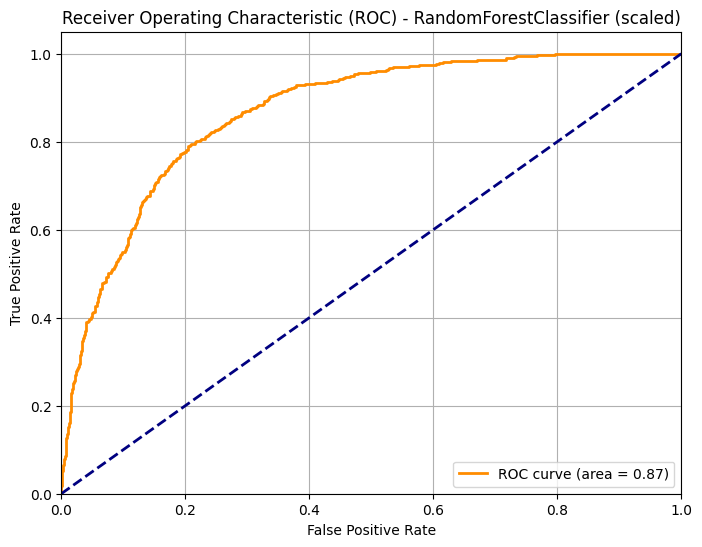

AUC Score: 0.8678

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN    FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  800   406  1176    5       0.9938  0.7434    0.4049   0.5753   
1       0.20  770   800   782   35       0.9565  0.4943    0.4961   0.6534   
2       0.30  720  1056   526   85       0.8944  0.3325    0.5778   0.7021   
3       0.40  629  1260   322  176       0.7814  0.2035    0.6614   0.7164   
4       0.50  486  1398   184  319       0.6037  0.1163    0.7254   0.6590   
5       0.60  320  1508    74  485       0.3975  0.0468    0.8122   0.5338   
6       0.70  131  1561    21  674       0.1627  0.0133    0.8618   0.2738   
7       0.80   18  1581     1  787       0.0224  0.0006    0.9474   0.0437   
8       0.90    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   
9       0.95    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   
10      0.99    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   

   F0.5 Score Specificity (TNR)  
0      0.4593            0.2566  
1      0.5490            0.5057  
2      0.6219            0.6675  
3      0.6824            0.7965  
4      0.6973            0.8837  
5      0.6720            0.9532  
6      0.4636            0.9867  
7      0.1022            0.9994  
8      0.0000            1.0000  
9      0.0000            1.0000  
10     0.0000            1.0000




--- Resultados para o Dataset: pca_80 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1582
           1       0.79      0.41      0.54       805

    accuracy                           0.76      2387
   macro avg       0.77      0.68      0.69      2387
weighted avg       0.77      0.76      0.74      2387


Matriz de Confusão (Threshold = 0.5):
[[1492   90]
 [ 474  331]]


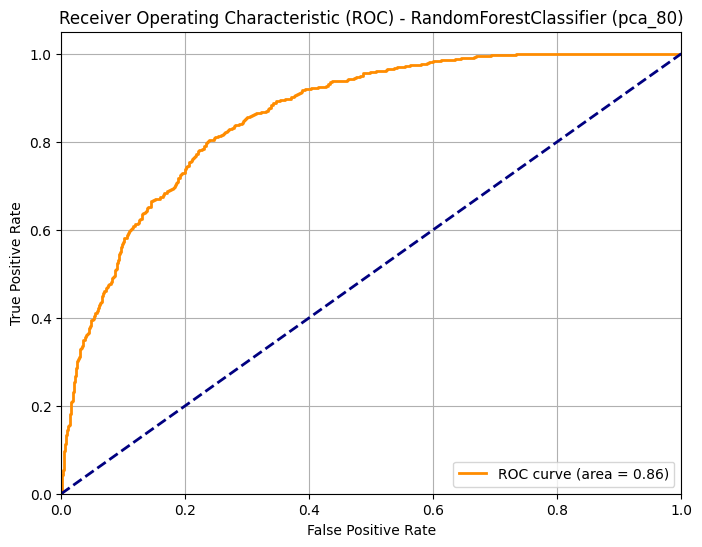

AUC Score: 0.8608

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN    FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  805    32  1550    0       1.0000  0.9798    0.3418   0.5095   
1       0.20  798   533  1049    7       0.9913  0.6631    0.4321   0.6018   
2       0.30  726   991   591   79       0.9019  0.3736    0.5513   0.6843   
3       0.40  565  1289   293  240       0.7019  0.1852    0.6585   0.6795   
4       0.50  331  1492    90  474       0.4112  0.0569    0.7862   0.5400   
5       0.60   65  1574     8  740       0.0807  0.0051    0.8904   0.1481   
6       0.70    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   
7       0.80    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   
8       0.90    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   
9       0.95    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   
10      0.99    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   

   F0.5 Score Specificity (TNR)  
0      0.3936            0.0202  
1      0.4870            0.3369  
2      0.5977            0.6264  
3      0.6667            0.8148  
4      0.6649            0.9431  
5      0.2963            0.9949  
6      0.0000            1.0000  
7      0.0000            1.0000  
8      0.0000            1.0000  
9      0.0000            1.0000  
10     0.0000            1.0000




--- Resultados para o Dataset: pca_90 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.76      0.93      0.84      1582
           1       0.76      0.43      0.55       805

    accuracy                           0.76      2387
   macro avg       0.76      0.68      0.69      2387
weighted avg       0.76      0.76      0.74      2387


Matriz de Confusão (Threshold = 0.5):
[[1473  109]
 [ 461  344]]


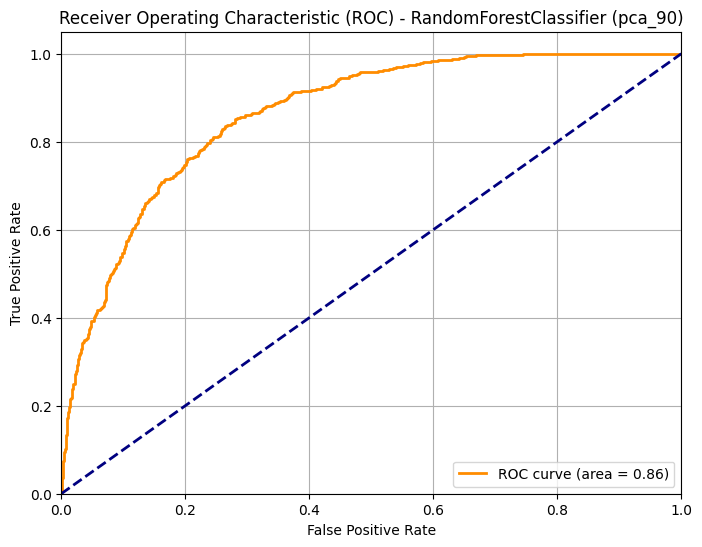

AUC Score: 0.8633

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN    FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  805    31  1551    0       1.0000  0.9804    0.3417   0.5093   
1       0.20  796   573  1009    9       0.9888  0.6378    0.4410   0.6100   
2       0.30  721  1012   570   84       0.8957  0.3603    0.5585   0.6880   
3       0.40  582  1293   289  223       0.7230  0.1827    0.6682   0.6945   
4       0.50  344  1473   109  461       0.4273  0.0689    0.7594   0.5469   
5       0.60  109  1568    14  696       0.1354  0.0088    0.8862   0.2349   
6       0.70   10  1581     1  795       0.0124  0.0006    0.9091   0.0245   
7       0.80    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   
8       0.90    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   
9       0.95    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   
10      0.99    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   

   F0.5 Score Specificity (TNR)  
0      0.3935            0.0196  
1      0.4960            0.3622  
2      0.6040            0.6397  
3      0.6785            0.8173  
4      0.6572            0.9311  
5      0.4202            0.9912  
6      0.0589            0.9994  
7      0.0000            1.0000  
8      0.0000            1.0000  
9      0.0000            1.0000  
10     0.0000            1.0000




--- Resultados para o Dataset: pca_95 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.72      0.98      0.83      1582
           1       0.87      0.26      0.40       805

    accuracy                           0.74      2387
   macro avg       0.79      0.62      0.62      2387
weighted avg       0.77      0.74      0.69      2387


Matriz de Confusão (Threshold = 0.5):
[[1549   33]
 [ 593  212]]


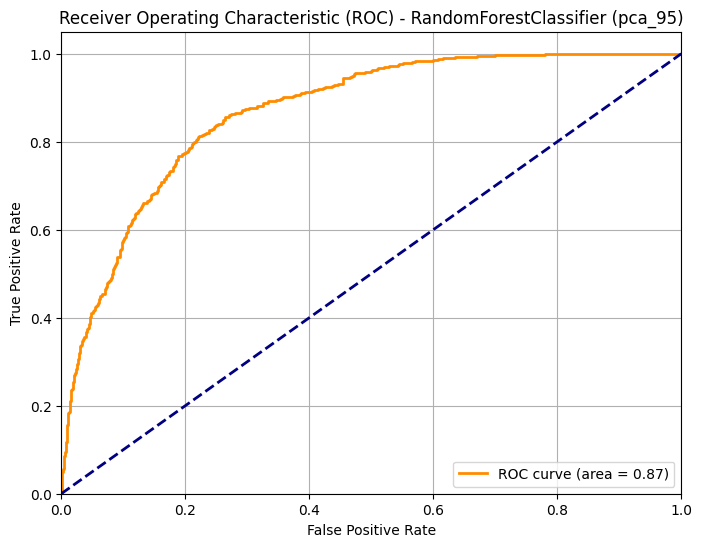

AUC Score: 0.8686

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN    FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  805     0  1582    0       1.0000  1.0000    0.3372   0.5044   
1       0.20  805   331  1251    0       1.0000  0.7908    0.3915   0.5627   
2       0.30  735   958   624   70       0.9130  0.3944    0.5408   0.6793   
3       0.40  545  1353   229  260       0.6770  0.1448    0.7041   0.6903   
4       0.50  212  1549    33  593       0.2634  0.0209    0.8653   0.4038   
5       0.60   27  1580     2  778       0.0335  0.0013    0.9310   0.0647   
6       0.70    2  1582     0  803       0.0025  0.0000    1.0000   0.0050   
7       0.80    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   
8       0.90    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   
9       0.95    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   
10      0.99    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   

   F0.5 Score Specificity (TNR)  
0      0.3888            0.0000  
1      0.4458            0.2092  
2      0.5888            0.6056  
3      0.6985            0.8552  
4      0.5938            0.9791  
5      0.1466            0.9987  
6      0.0123            1.0000  
7      0.0000            1.0000  
8      0.0000            1.0000  
9      0.0000            1.0000  
10     0.0000            1.0000




#####################################################
### Avaliação para o Modelo: DecisionTreeClassifier ###
#####################################################

--- Resultados para o Dataset: scaled ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1582
           1       0.62      0.65      0.64       805

    accuracy                           0.75      2387
   macro avg       0.72      0.72      0.72      2387
weighted avg       0.75      0.75      0.75      2387


Matriz de Confusão (Threshold = 0.5):
[[1262  320]
 [ 280  525]]


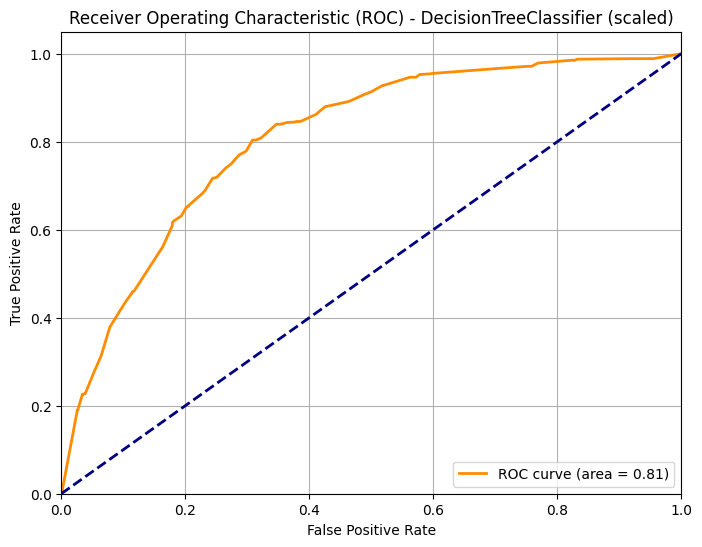

AUC Score: 0.8078

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN   FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  762   677  905   43       0.9466  0.5721    0.4571   0.6165   
1       0.20  681   972  610  124       0.8460  0.3856    0.5275   0.6498   
2       0.30  627  1110  472  178       0.7789  0.2984    0.5705   0.6586   
3       0.40  603  1149  433  202       0.7491  0.2737    0.5820   0.6551   
4       0.50  525  1261  321  280       0.6522  0.2029    0.6206   0.6360   
5       0.60  351  1418  164  454       0.4360  0.1037    0.6816   0.5318   
6       0.70  183  1521   61  622       0.2273  0.0386    0.7500   0.3489   
7       0.80  153  1540   42  652       0.1901  0.0265    0.7846   0.3060   
8       0.90    5  1579    3  800       0.0062  0.0019    0.6250   0.0123   
9       0.95    5  1581    1  800       0.0062  0.0006    0.8333   0.0123   
10      0.99    5  1581    1  800       0.0062  0.0006    0.8333   0.0123   

   F0.5 Score Specificity (TNR)  
0      0.5098            0.4279  
1      0.5704            0.6144  
2      0.6028            0.7016  
3      0.6092            0.7263  
4      0.6266            0.7971  
5      0.6126            0.8963  
6      0.5138            0.9614  
7      0.4826            0.9735  
8      0.0299            0.9981  
9      0.0302            0.9994  
10     0.0302            0.9994




--- Resultados para o Dataset: pca_80 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      1582
           1       0.56      0.61      0.58       805

    accuracy                           0.71      2387
   macro avg       0.68      0.68      0.68      2387
weighted avg       0.71      0.71      0.71      2387


Matriz de Confusão (Threshold = 0.5):
[[1192  390]
 [ 312  493]]


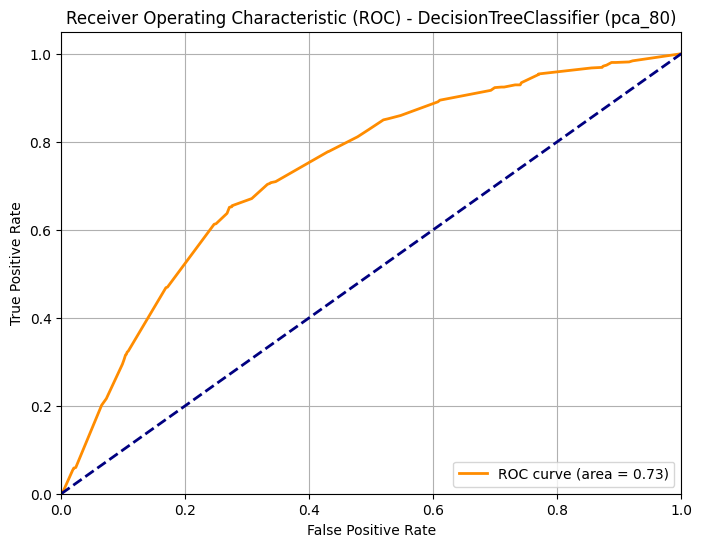

AUC Score: 0.7346

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN    FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  748   424  1158   57       0.9292  0.7320    0.3924   0.5518   
1       0.20  686   748   834  119       0.8522  0.5272    0.4513   0.5901   
2       0.30  568  1049   533  237       0.7056  0.3369    0.5159   0.5960   
3       0.40  527  1146   436  278       0.6547  0.2756    0.5472   0.5962   
4       0.50  494  1187   395  311       0.6137  0.2497    0.5557   0.5832   
5       0.60  261  1411   171  544       0.3242  0.1081    0.6042   0.4220   
6       0.70   48  1545    37  757       0.0596  0.0234    0.5647   0.1079   
7       0.80    3  1581     1  802       0.0037  0.0006    0.7500   0.0074   
8       0.90    3  1581     1  802       0.0037  0.0006    0.7500   0.0074   
9       0.95    3  1581     1  802       0.0037  0.0006    0.7500   0.0074   
10      0.99    3  1581     1  802       0.0037  0.0006    0.7500   0.0074   

   F0.5 Score Specificity (TNR)  
0      0.4437            0.2680  
1      0.4982            0.4728  
2      0.5452            0.6631  
3      0.5658            0.7244  
4      0.5664            0.7503  
5      0.5152            0.8919  
6      0.2096            0.9766  
7      0.0183            0.9994  
8      0.0183            0.9994  
9      0.0183            0.9994  
10     0.0183            0.9994




--- Resultados para o Dataset: pca_90 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1582
           1       0.62      0.56      0.59       805

    accuracy                           0.73      2387
   macro avg       0.70      0.69      0.70      2387
weighted avg       0.73      0.73      0.73      2387


Matriz de Confusão (Threshold = 0.5):
[[1305  277]
 [ 356  449]]


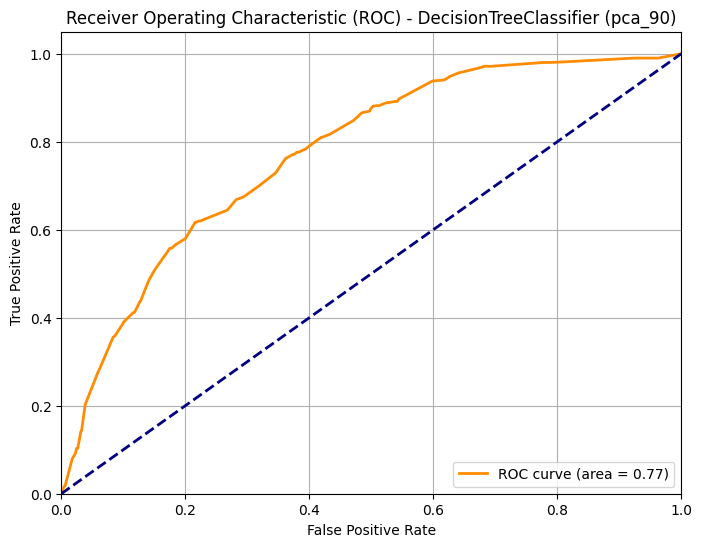

AUC Score: 0.7736

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN    FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  781   507  1075   24       0.9702  0.6795    0.4208   0.5870   
1       0.20  709   786   796   96       0.8807  0.5032    0.4711   0.6139   
2       0.30  625   980   602  180       0.7764  0.3805    0.5094   0.6152   
3       0.40  497  1236   346  308       0.6174  0.2187    0.5896   0.6032   
4       0.50  449  1301   281  356       0.5578  0.1776    0.6151   0.5850   
5       0.60  352  1381   201  453       0.4373  0.1271    0.6365   0.5184   
6       0.70  227  1485    97  578       0.2820  0.0613    0.7006   0.4021   
7       0.80   71  1548    34  734       0.0882  0.0215    0.6762   0.1560   
8       0.90    6  1580     2  799       0.0075  0.0013    0.7500   0.0148   
9       0.95    6  1580     2  799       0.0075  0.0013    0.7500   0.0148   
10      0.99    6  1580     2  799       0.0075  0.0013    0.7500   0.0148   

   F0.5 Score Specificity (TNR)  
0      0.4745            0.3205  
1      0.5194            0.4968  
2      0.5470            0.6195  
3      0.5949            0.7813  
4      0.6027            0.8224  
5      0.5834            0.8729  
6      0.5402            0.9387  
7      0.2898            0.9785  
8      0.0358            0.9987  
9      0.0358            0.9987  
10     0.0358            0.9987




--- Resultados para o Dataset: pca_95 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.73      0.88      0.80      1582
           1       0.61      0.35      0.44       805

    accuracy                           0.70      2387
   macro avg       0.67      0.62      0.62      2387
weighted avg       0.69      0.70      0.68      2387


Matriz de Confusão (Threshold = 0.5):
[[1400  182]
 [ 525  280]]


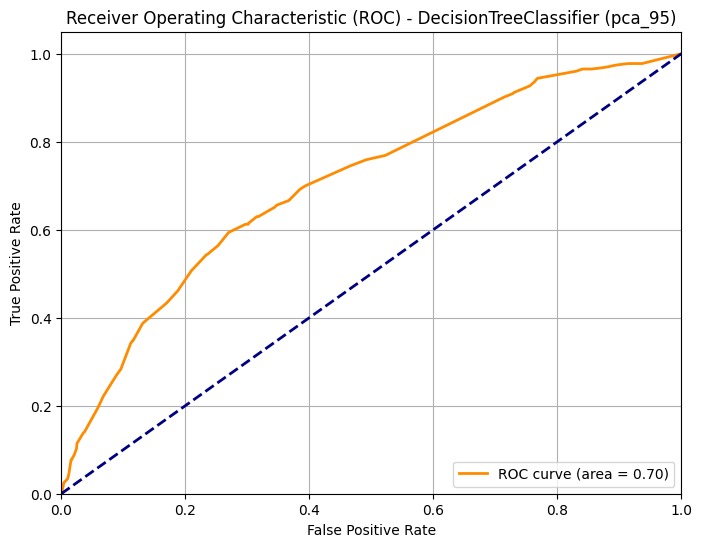

AUC Score: 0.7043

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN    FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  773   268  1314   32       0.9602  0.8306    0.3704   0.5346   
1       0.20  734   427  1155   71       0.9118  0.7301    0.3886   0.5449   
2       0.30  528  1032   550  277       0.6559  0.3477    0.4898   0.5608   
3       0.40  493  1106   476  312       0.6124  0.3009    0.5088   0.5558   
4       0.50  280  1399   183  525       0.3478  0.1157    0.6048   0.4416   
5       0.60  218  1440   142  587       0.2708  0.0898    0.6056   0.3742   
6       0.70   92  1542    40  713       0.1143  0.0253    0.6970   0.1964   
7       0.80   62  1556    26  743       0.0770  0.0164    0.7045   0.1389   
8       0.90   21  1574     8  784       0.0261  0.0051    0.7241   0.0504   
9       0.95   11  1578     4  794       0.0137  0.0025    0.7333   0.0268   
10      0.99   11  1578     4  794       0.0137  0.0025    0.7333   0.0268   

   F0.5 Score Specificity (TNR)  
0      0.4223            0.1694  
1      0.4389            0.2699  
2      0.5159            0.6523  
3      0.5266            0.6991  
4      0.5269            0.8843  
5      0.4855            0.9102  
6      0.3451            0.9747  
7      0.2679            0.9836  
8      0.1140            0.9949  
9      0.0636            0.9975  
10     0.0636            0.9975




#####################################################
### Avaliação para o Modelo: SVC ###
#####################################################

--- Resultados para o Dataset: scaled ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.94      0.55      0.69      1582
           1       0.51      0.93      0.66       805

    accuracy                           0.68      2387
   macro avg       0.72      0.74      0.67      2387
weighted avg       0.79      0.68      0.68      2387


Matriz de Confusão (Threshold = 0.5):
[[864 718]
 [ 57 748]]


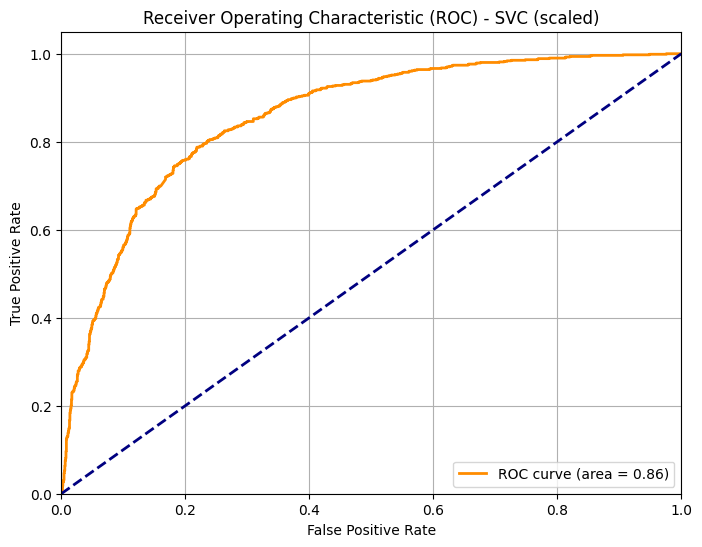

AUC Score: 0.8555

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN    FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  803   117  1465    2       0.9975  0.9260    0.3541   0.5226   
1       0.20  777   641   941   28       0.9652  0.5948    0.4523   0.6159   
2       0.30  726   978   604   79       0.9019  0.3818    0.5459   0.6801   
3       0.40  658  1175   407  147       0.8174  0.2573    0.6178   0.7037   
4       0.50  575  1316   266  230       0.7143  0.1681    0.6837   0.6987   
5       0.60  461  1416   166  344       0.5727  0.1049    0.7352   0.6439   
6       0.70  339  1488    94  466       0.4211  0.0594    0.7829   0.5477   
7       0.80  214  1541    41  591       0.2658  0.0259    0.8392   0.4038   
8       0.90   74  1570    12  731       0.0919  0.0076    0.8605   0.1661   
9       0.95   16  1578     4  789       0.0199  0.0025    0.8000   0.0388   
10      0.99    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   

   F0.5 Score Specificity (TNR)  
0      0.4065            0.0740  
1      0.5061            0.4052  
2      0.5927            0.6182  
3      0.6496            0.7427  
4      0.6896            0.8319  
5      0.6957            0.8951  
6      0.6681            0.9406  
7      0.5863            0.9741  
8      0.3220            0.9924  
9      0.0904            0.9975  
10     0.0000            1.0000




--- Resultados para o Dataset: pca_80 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.93      0.53      0.68      1582
           1       0.50      0.92      0.65       805

    accuracy                           0.66      2387
   macro avg       0.71      0.73      0.66      2387
weighted avg       0.78      0.66      0.67      2387


Matriz de Confusão (Threshold = 0.5):
[[843 739]
 [ 66 739]]


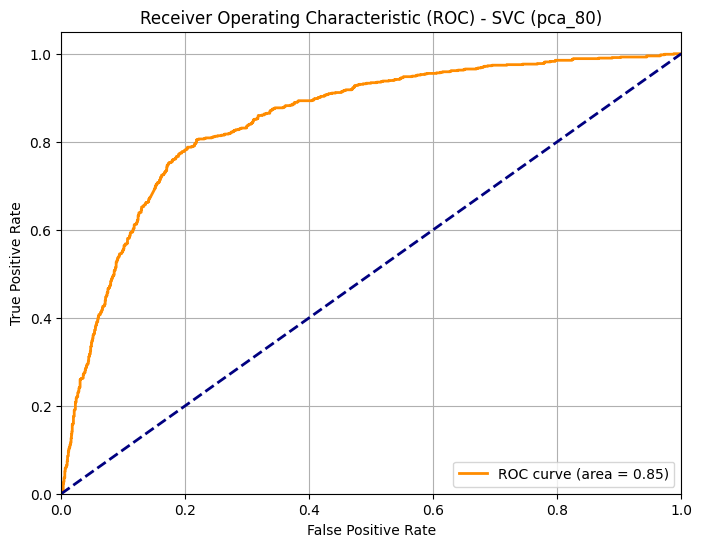

AUC Score: 0.8479

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN    FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  801    58  1524    4       0.9950  0.9633    0.3445   0.5118   
1       0.20  785   442  1140   20       0.9752  0.7206    0.4078   0.5751   
2       0.30  747   831   751   58       0.9280  0.4747    0.4987   0.6487   
3       0.40  672  1109   473  133       0.8348  0.2990    0.5869   0.6892   
4       0.50  557  1344   238  248       0.6919  0.1504    0.7006   0.6963   
5       0.60  401  1447   135  404       0.4981  0.0853    0.7481   0.5981   
6       0.70  236  1517    65  569       0.2932  0.0411    0.7841   0.4268   
7       0.80  117  1554    28  688       0.1453  0.0177    0.8069   0.2463   
8       0.90   29  1575     7  776       0.0360  0.0044    0.8056   0.0690   
9       0.95    5  1579     3  800       0.0062  0.0019    0.6250   0.0123   
10      0.99    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   

   F0.5 Score Specificity (TNR)  
0      0.3963            0.0367  
1      0.4615            0.2794  
2      0.5495            0.5253  
3      0.6240            0.7010  
4      0.6989            0.8496  
5      0.6799            0.9147  
6      0.5874            0.9589  
7      0.4224            0.9823  
8      0.1528            0.9956  
9      0.0299            0.9981  
10     0.0000            1.0000




--- Resultados para o Dataset: pca_90 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.93      0.56      0.70      1582
           1       0.51      0.91      0.66       805

    accuracy                           0.68      2387
   macro avg       0.72      0.74      0.68      2387
weighted avg       0.79      0.68      0.68      2387


Matriz de Confusão (Threshold = 0.5):
[[885 697]
 [ 71 734]]


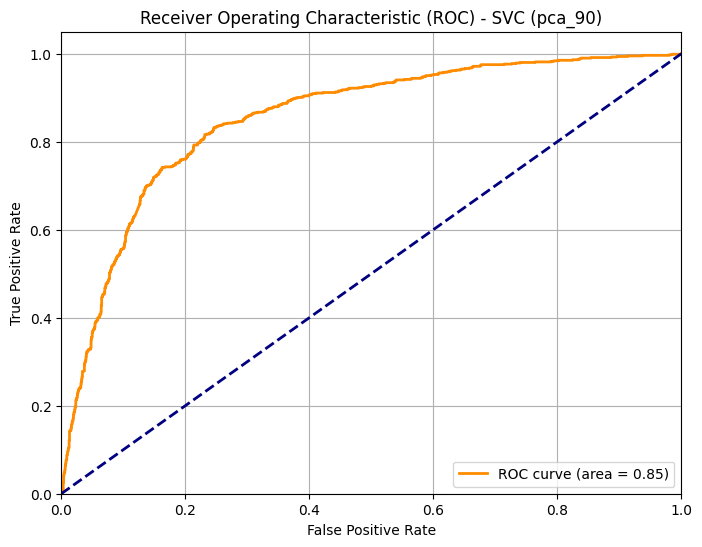

AUC Score: 0.8525

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN    FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  802    70  1512    3       0.9963  0.9558    0.3466   0.5143   
1       0.20  785   506  1076   20       0.9752  0.6802    0.4218   0.5889   
2       0.30  735   880   702   70       0.9130  0.4437    0.5115   0.6557   
3       0.40  638  1239   343  167       0.7925  0.2168    0.6504   0.7144   
4       0.50  528  1383   199  277       0.6559  0.1258    0.7263   0.6893   
5       0.60  387  1463   119  418       0.4807  0.0752    0.7648   0.5904   
6       0.70  244  1520    62  561       0.3031  0.0392    0.7974   0.4392   
7       0.80  121  1556    26  684       0.1503  0.0164    0.8231   0.2542   
8       0.90   25  1576     6  780       0.0311  0.0038    0.8065   0.0598   
9       0.95    2  1580     2  803       0.0025  0.0013    0.5000   0.0049   
10      0.99    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   

   F0.5 Score Specificity (TNR)  
0      0.3986            0.0442  
1      0.4758            0.3198  
2      0.5608            0.5563  
3      0.6746            0.7832  
4      0.7110            0.8742  
5      0.6840            0.9248  
6      0.6013            0.9608  
7      0.4343            0.9836  
8      0.1346            0.9962  
9      0.0122            0.9987  
10     0.0000            1.0000




--- Resultados para o Dataset: pca_95 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1582
           1       0.54      0.91      0.68       805

    accuracy                           0.70      2387
   macro avg       0.73      0.76      0.70      2387
weighted avg       0.80      0.70      0.71      2387


Matriz de Confusão (Threshold = 0.5):
[[947 635]
 [ 70 735]]


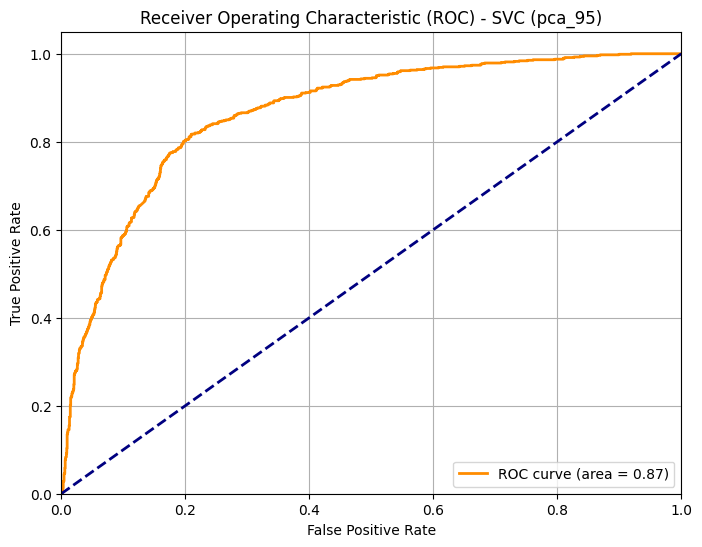

AUC Score: 0.8653

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN    FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  805   125  1457    0       1.0000  0.9210    0.3559   0.5249   
1       0.20  784   521  1061   21       0.9739  0.6707    0.4249   0.5917   
2       0.30  742   924   658   63       0.9217  0.4159    0.5300   0.6730   
3       0.40  649  1258   324  156       0.8062  0.2048    0.6670   0.7300   
4       0.50  535  1369   213  270       0.6646  0.1346    0.7152   0.6890   
5       0.60  413  1461   121  392       0.5130  0.0765    0.7734   0.6169   
6       0.70  293  1518    64  512       0.3640  0.0405    0.8207   0.5043   
7       0.80  145  1559    23  660       0.1801  0.0145    0.8631   0.2980   
8       0.90   33  1575     7  772       0.0410  0.0044    0.8250   0.0781   
9       0.95    8  1579     3  797       0.0099  0.0019    0.7273   0.0196   
10      0.99    0  1582     0  805       0.0000  0.0000    0.0000   0.0000   

   F0.5 Score Specificity (TNR)  
0      0.4085            0.0790  
1      0.4789            0.3293  
2      0.5792            0.5841  
3      0.6909            0.7952  
4      0.7045            0.8654  
5      0.7021            0.9235  
6      0.6561            0.9595  
7      0.4909            0.9855  
8      0.1710            0.9956  
9      0.0471            0.9981  
10     0.0000            1.0000




#####################################################
### Avaliação para o Modelo: SGDClassifier ###
#####################################################

--- Resultados para o Dataset: scaled ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1582
           1       0.72      0.64      0.68       805

    accuracy                           0.80      2387
   macro avg       0.77      0.76      0.76      2387
weighted avg       0.79      0.80      0.79      2387


Matriz de Confusão (Threshold = 0.5):
[[1387  195]
 [ 293  512]]


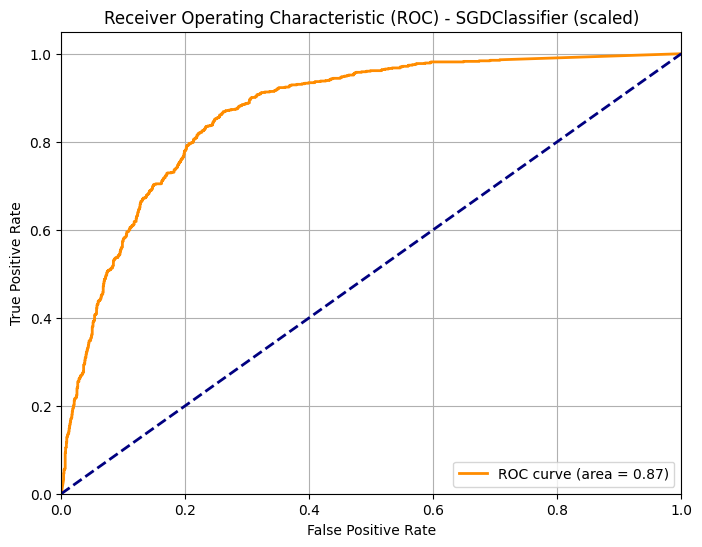

AUC Score: 0.8681

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN   FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  790   631  951   15       0.9814  0.6011    0.4538   0.6206   
1       0.20  766   842  740   39       0.9516  0.4678    0.5086   0.6629   
2       0.30  730  1081  501   75       0.9068  0.3167    0.5930   0.7171   
3       0.40  647  1244  338  158       0.8037  0.2137    0.6569   0.7229   
4       0.50  512  1387  195  293       0.6360  0.1233    0.7242   0.6772   
5       0.60  382  1474  108  423       0.4745  0.0683    0.7796   0.5900   
6       0.70  241  1522   60  564       0.2994  0.0379    0.8007   0.4358   
7       0.80  132  1558   24  673       0.1640  0.0152    0.8462   0.2747   
8       0.90   64  1572   10  741       0.0795  0.0063    0.8649   0.1456   
9       0.95   44  1574    8  761       0.0547  0.0051    0.8462   0.1027   
10      0.99   31  1576    6  774       0.0385  0.0038    0.8378   0.0736   

   F0.5 Score Specificity (TNR)  
0      0.5084            0.3989  
1      0.5608            0.5322  
2      0.6371            0.6833  
3      0.6818            0.7863  
4      0.7047            0.8767  
5      0.6908            0.9317  
6      0.5998            0.9621  
7      0.4619            0.9848  
8      0.2906            0.9937  
9      0.2172            0.9949  
10     0.1626            0.9962




--- Resultados para o Dataset: pca_80 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1582
           1       0.67      0.58      0.62       805

    accuracy                           0.76      2387
   macro avg       0.74      0.72      0.73      2387
weighted avg       0.76      0.76      0.76      2387


Matriz de Confusão (Threshold = 0.5):
[[1355  227]
 [ 336  469]]


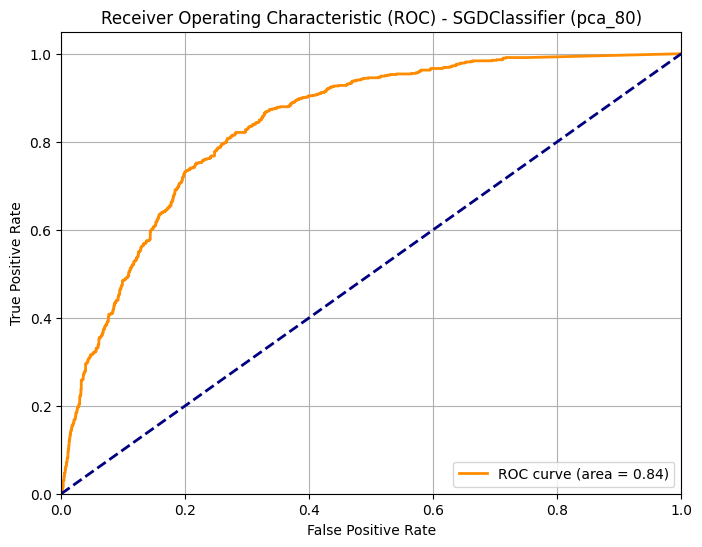

AUC Score: 0.8389

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN    FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  786   573  1009   19       0.9764  0.6378    0.4379   0.6046   
1       0.20  764   767   815   41       0.9491  0.5152    0.4839   0.6409   
2       0.30  708  1007   575   97       0.8795  0.3635    0.5518   0.6782   
3       0.40  618  1198   384  187       0.7677  0.2427    0.6168   0.6840   
4       0.50  469  1355   227  336       0.5826  0.1435    0.6739   0.6249   
5       0.60  309  1467   115  496       0.3839  0.0727    0.7288   0.5028   
6       0.70  190  1532    50  615       0.2360  0.0316    0.7917   0.3636   
7       0.80  106  1559    23  699       0.1317  0.0145    0.8217   0.2270   
8       0.90   38  1572    10  767       0.0472  0.0063    0.7917   0.0891   
9       0.95   27  1575     7  778       0.0335  0.0044    0.7941   0.0644   
10      0.99   18  1577     5  787       0.0224  0.0032    0.7826   0.0435   

   F0.5 Score Specificity (TNR)  
0      0.4922            0.3622  
1      0.5364            0.4848  
2      0.5963            0.6365  
3      0.6420            0.7573  
4      0.6534            0.8565  
5      0.6178            0.9273  
6      0.5382            0.9684  
7      0.4012            0.9855  
8      0.1906            0.9937  
9      0.1435            0.9956  
10     0.1003            0.9968




--- Resultados para o Dataset: pca_90 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.81      0.86      0.83      1582
           1       0.69      0.59      0.64       805

    accuracy                           0.77      2387
   macro avg       0.75      0.73      0.73      2387
weighted avg       0.77      0.77      0.77      2387


Matriz de Confusão (Threshold = 0.5):
[[1366  216]
 [ 329  476]]


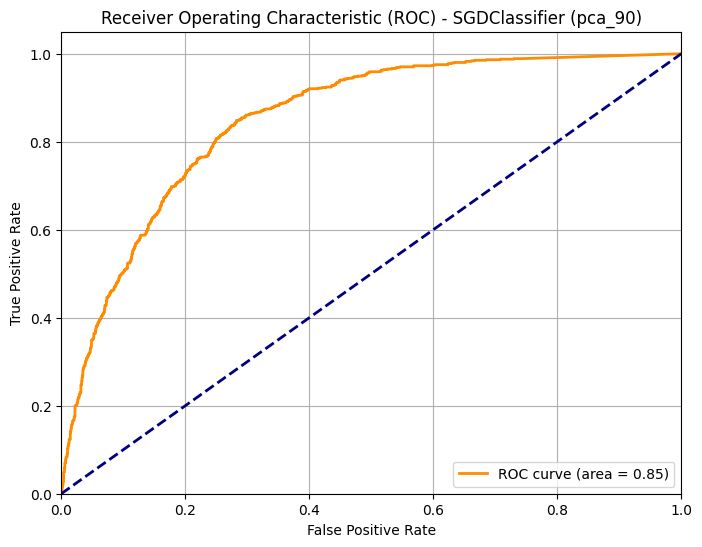

AUC Score: 0.8491

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN   FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  785   600  982   20       0.9752  0.6207    0.4443   0.6104   
1       0.20  769   802  780   36       0.9553  0.4930    0.4964   0.6534   
2       0.30  712  1026  556   93       0.8845  0.3515    0.5615   0.6869   
3       0.40  622  1206  376  183       0.7727  0.2377    0.6232   0.6900   
4       0.50  476  1366  216  329       0.5913  0.1365    0.6879   0.6359   
5       0.60  336  1472  110  469       0.4174  0.0695    0.7534   0.5372   
6       0.70  211  1529   53  594       0.2621  0.0335    0.7992   0.3948   
7       0.80  116  1557   25  689       0.1441  0.0158    0.8227   0.2452   
8       0.90   53  1573    9  752       0.0658  0.0057    0.8548   0.1223   
9       0.95   32  1576    6  773       0.0398  0.0038    0.8421   0.0759   
10      0.99   26  1576    6  779       0.0323  0.0038    0.8125   0.0621   

   F0.5 Score Specificity (TNR)  
0      0.4985            0.3793  
1      0.5492            0.5070  
2      0.6058            0.6485  
3      0.6483            0.7623  
4      0.6661            0.8635  
5      0.6489            0.9305  
6      0.5669            0.9665  
7      0.4237            0.9842  
8      0.2517            0.9943  
9      0.1672            0.9962  
10     0.1393            0.9962




--- Resultados para o Dataset: pca_95 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1582
           1       0.71      0.61      0.65       805

    accuracy                           0.78      2387
   macro avg       0.76      0.74      0.75      2387
weighted avg       0.78      0.78      0.78      2387


Matriz de Confusão (Threshold = 0.5):
[[1378  204]
 [ 315  490]]


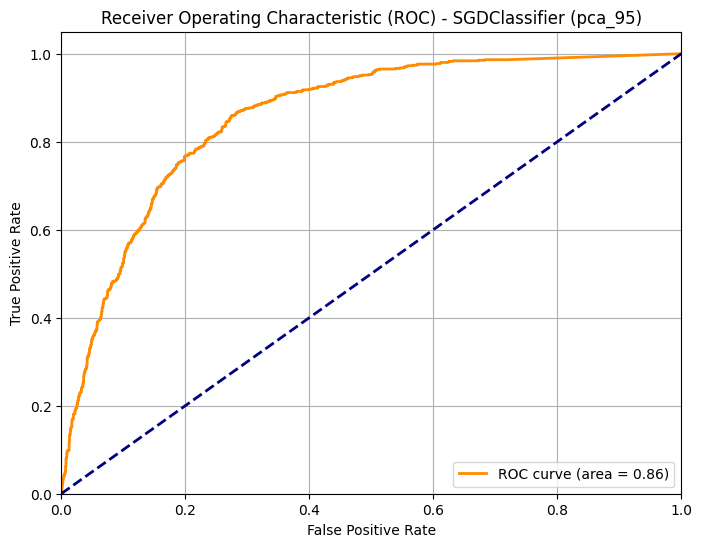

AUC Score: 0.8571

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN   FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  787   619  963   18       0.9776  0.6087    0.4497   0.6160   
1       0.20  763   829  753   42       0.9478  0.4760    0.5033   0.6575   
2       0.30  717  1053  529   88       0.8907  0.3344    0.5754   0.6992   
3       0.40  634  1228  354  171       0.7876  0.2238    0.6417   0.7072   
4       0.50  490  1378  204  315       0.6087  0.1290    0.7061   0.6538   
5       0.60  340  1476  106  465       0.4224  0.0670    0.7623   0.5436   
6       0.70  215  1524   58  590       0.2671  0.0367    0.7875   0.3989   
7       0.80  116  1558   24  689       0.1441  0.0152    0.8286   0.2455   
8       0.90   61  1570   12  744       0.0758  0.0076    0.8356   0.1390   
9       0.95   37  1573    9  768       0.0460  0.0057    0.8043   0.0870   
10      0.99   30  1576    6  775       0.0373  0.0038    0.8333   0.0713   

   F0.5 Score Specificity (TNR)  
0      0.5042            0.3913  
1      0.5554            0.5240  
2      0.6193            0.6656  
3      0.6664            0.7762  
4      0.6842            0.8710  
5      0.6566            0.9330  
6      0.5667            0.9633  
7      0.4249            0.9848  
8      0.2780            0.9924  
9      0.1871            0.9943  
10     0.1581            0.9962




#####################################################
### Avaliação para o Modelo: KNeighborsClassifier ###
#####################################################

--- Resultados para o Dataset: scaled ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1582
           1       0.73      0.67      0.70       805

    accuracy                           0.80      2387
   macro avg       0.78      0.77      0.77      2387
weighted avg       0.80      0.80      0.80      2387


Matriz de Confusão (Threshold = 0.5):
[[1381  201]
 [ 269  536]]


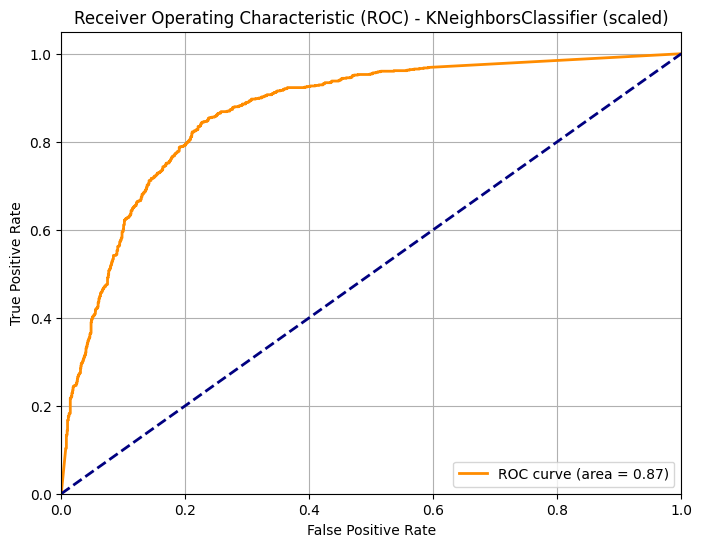

AUC Score: 0.8687

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN   FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  771   777  805   34       0.9578  0.5088    0.4892   0.6476   
1       0.20  743  1001  581   62       0.9230  0.3673    0.5612   0.6980   
2       0.30  699  1170  412  106       0.8683  0.2604    0.6292   0.7296   
3       0.40  626  1285  297  179       0.7776  0.1877    0.6782   0.7245   
4       0.50  536  1381  201  269       0.6658  0.1271    0.7273   0.6952   
5       0.60  431  1449  133  374       0.5354  0.0841    0.7642   0.6297   
6       0.70  318  1504   78  487       0.3950  0.0493    0.8030   0.5296   
7       0.80  203  1542   40  602       0.2522  0.0253    0.8354   0.3874   
8       0.90  119  1566   16  686       0.1478  0.0101    0.8815   0.2532   
9       0.95   83  1570   12  722       0.1031  0.0076    0.8737   0.1844   
10      0.99   80  1571   11  725       0.0994  0.0070    0.8791   0.1786   

   F0.5 Score Specificity (TNR)  
0      0.5423            0.4912  
1      0.6089            0.6327  
2      0.6658            0.7396  
3      0.6960            0.8123  
4      0.7141            0.8729  
5      0.7040            0.9159  
6      0.6656            0.9507  
7      0.5712            0.9747  
8      0.4424            0.9899  
9      0.3502            0.9924  
10     0.3422            0.9930




--- Resultados para o Dataset: pca_80 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1582
           1       0.71      0.63      0.67       805

    accuracy                           0.79      2387
   macro avg       0.77      0.75      0.76      2387
weighted avg       0.78      0.79      0.79      2387


Matriz de Confusão (Threshold = 0.5):
[[1371  211]
 [ 294  511]]


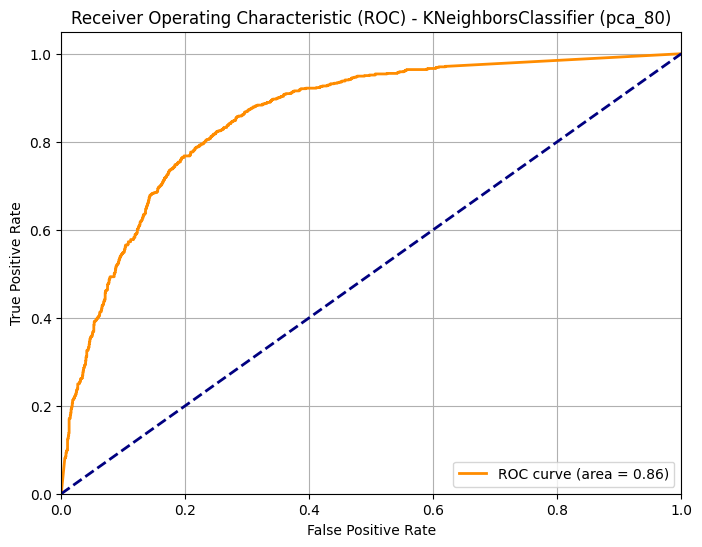

AUC Score: 0.8564

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN   FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  772   718  864   33       0.9590  0.5461    0.4719   0.6325   
1       0.20  742   953  629   63       0.9217  0.3976    0.5412   0.6820   
2       0.30  687  1136  446  118       0.8534  0.2819    0.6064   0.7090   
3       0.40  618  1260  322  187       0.7677  0.2035    0.6574   0.7083   
4       0.50  511  1371  211  294       0.6348  0.1334    0.7078   0.6693   
5       0.60  404  1445  137  401       0.5019  0.0866    0.7468   0.6003   
6       0.70  287  1507   75  518       0.3565  0.0474    0.7928   0.4919   
7       0.80  179  1546   36  626       0.2224  0.0228    0.8326   0.3510   
8       0.90   94  1566   16  711       0.1168  0.0101    0.8545   0.2055   
9       0.95   66  1571   11  739       0.0820  0.0070    0.8571   0.1497   
10      0.99   65  1572   10  740       0.0807  0.0063    0.8667   0.1477   

   F0.5 Score Specificity (TNR)  
0      0.5252            0.4539  
1      0.5899            0.6024  
2      0.6436            0.7181  
3      0.6769            0.7965  
4      0.6918            0.8666  
5      0.6804            0.9134  
6      0.6369            0.9526  
7      0.5375            0.9772  
8      0.3775            0.9899  
9      0.2965            0.9930  
10     0.2941            0.9937




--- Resultados para o Dataset: pca_90 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1582
           1       0.71      0.63      0.66       805

    accuracy                           0.79      2387
   macro avg       0.76      0.75      0.75      2387
weighted avg       0.78      0.79      0.78      2387


Matriz de Confusão (Threshold = 0.5):
[[1373  209]
 [ 301  504]]


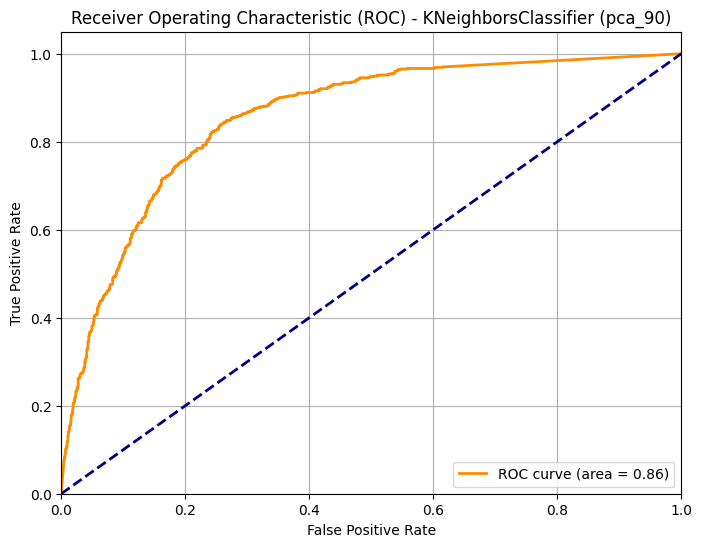

AUC Score: 0.8553

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN   FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  776   720  862   29       0.9640  0.5449    0.4737   0.6353   
1       0.20  734   952  630   71       0.9118  0.3982    0.5381   0.6768   
2       0.30  686  1147  435  119       0.8522  0.2750    0.6120   0.7124   
3       0.40  610  1268  314  195       0.7578  0.1985    0.6602   0.7056   
4       0.50  504  1373  209  301       0.6261  0.1321    0.7069   0.6640   
5       0.60  403  1441  141  402       0.5006  0.0891    0.7408   0.5975   
6       0.70  296  1508   74  509       0.3677  0.0468    0.8000   0.5038   
7       0.80  178  1546   36  627       0.2211  0.0228    0.8318   0.3494   
8       0.90   86  1568   14  719       0.1068  0.0088    0.8600   0.1901   
9       0.95   65  1574    8  740       0.0807  0.0051    0.8904   0.1481   
10      0.99   63  1574    8  742       0.0783  0.0051    0.8873   0.1438   

   F0.5 Score Specificity (TNR)  
0      0.5274            0.4551  
1      0.5862            0.6018  
2      0.6485            0.7250  
3      0.6776            0.8015  
4      0.6891            0.8679  
5      0.6759            0.9109  
6      0.6477            0.9532  
7      0.5358            0.9772  
8      0.3568            0.9912  
9      0.2963            0.9949  
10     0.2893            0.9949




--- Resultados para o Dataset: pca_95 ---

Relatório de Classificação (Threshold = 0.5):
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1582
           1       0.71      0.65      0.68       805

    accuracy                           0.79      2387
   macro avg       0.77      0.76      0.76      2387
weighted avg       0.79      0.79      0.79      2387


Matriz de Confusão (Threshold = 0.5):
[[1372  210]
 [ 285  520]]


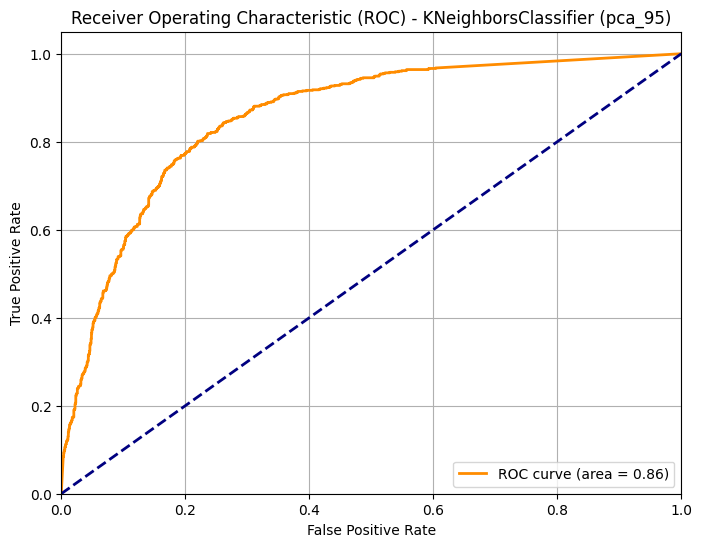

AUC Score: 0.8570

Análise de Desempenho com Diferentes Thresholds:


Threshold   TP    TN   FP   FN Recall (TPR)     FPR Precision F1 Score  \
0       0.10  773   719  863   32       0.9602  0.5455    0.4725   0.6333   
1       0.20  738   949  633   67       0.9168  0.4001    0.5383   0.6783   
2       0.30  685  1144  438  120       0.8509  0.2769    0.6100   0.7106   
3       0.40  614  1280  302  191       0.7627  0.1909    0.6703   0.7135   
4       0.50  520  1372  210  285       0.6460  0.1327    0.7123   0.6775   
5       0.60  407  1447  135  398       0.5056  0.0853    0.7509   0.6043   
6       0.70  305  1501   81  500       0.3789  0.0512    0.7902   0.5122   
7       0.80  165  1546   36  640       0.2050  0.0228    0.8209   0.3280   
8       0.90   85  1572   10  720       0.1056  0.0063    0.8947   0.1889   
9       0.95   69  1576    6  736       0.0857  0.0038    0.9200   0.1568   
10      0.99   68  1576    6  737       0.0845  0.0038    0.9189   0.1547   

   F0.5 Score Specificity (TNR)  
0      0.5259            0.4545  
1      0.5867            0.5999  
2      0.6466            0.7231  
3      0.6870            0.8091  
4      0.6980            0.8673  
5      0.6845            0.9147  
6      0.6492            0.9488  
7      0.5127            0.9772  
8      0.3586            0.9937  
9      0.3122            0.9962  
10     0.3088            0.9962

In [ ]:
print("--- Início da Avaliação Detalhada dos Modelos ---")

# Dicionário para mapear dataset_type para o respectivo X_test
test_data_map = {
    "scaled": X_test,
    "pca_80": X_test_80,
    "pca_90": X_test_90,
    "pca_95": X_test_95,
}

for model_name, dataset_results in model_performance.items():
    print(f"\n#####################################################")
    print(f"### Avaliação para o Modelo: {model_name} ###")
    print(f"#####################################################")

    for dataset_type, metrics in dataset_results.items():
        print(f"\n--- Resultados para o Dataset: {dataset_type} ---")

        y_pred = metrics["y_pred"]
        y_proba = metrics["y_proba"]

        # 1. Relatório de Classificação para o threshold padrão (0.5)
        print(f"\nRelatório de Classificação (Threshold = 0.5):")
        print(classification_report(y_test, y_pred))

        # 2. Matriz de Confusão para o threshold padrão (0.5)
        print(f"\nMatriz de Confusão (Threshold = 0.5):\n{confusion_matrix(y_test, y_pred)}")

        # 3. Curva ROC (apenas se y_proba não for None)
        if y_proba is not None:
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            auc_score = auc(fpr, tpr)

            plt.figure(figsize=(8, 6))
            plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
            plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Receiver Operating Characteristic (ROC) - {model_name} ({dataset_type})')
            plt.legend(loc="lower right")
            plt.grid(True)
            plt.show()
            print(f"AUC Score: {auc_score:.4f}")
        else:
            print("Curva ROC não disponível (modelo não suporta predict_proba ou probability=False).")

        # 4. Análise de Desempenho com Diferentes Thresholds
        print(f"\nAnálise de Desempenho com Diferentes Thresholds:")
        performance_thresholds = []
        # Adaptei a lista de thresholds para incluir o 0.5 que já é padrão na classification_report
        # mas pode ser útil ter aqui para comparação direta.
        for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
            if y_proba is None: # Se não há probabilidades, não se pode variar o threshold
                continue

            y_pred_threshold = (y_proba >= threshold).astype(int)
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred_threshold, labels=[0, 1]).ravel()

            tpr = tp / (tp + fn) if (tp + fn) > 0 else 0 # Recall
            fpr = fp / (fp + tn) if (tn + fp) > 0 else 0
            fnr = fn / (tp + fn) if (tp + fn) > 0 else 0
            tnr = tn / (tn + fp) if (tn + fp) > 0 else 0 # Specificity

            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            f1 = 2 * (precision * tpr) / (precision + tpr) if (precision + tpr) > 0 else 0

            # F0.5 (fbeta_score com beta=0.5, dando mais peso à Precision)
            # Formula: (1 + beta^2) * (precision * recall) / (beta^2 * precision + recall)
            # Para beta = 0.5: (1 + 0.25) * (precision * recall) / (0.25 * precision + recall)
            f0_5 = (1.25 * precision * tpr) / (0.25 * precision + tpr) if (0.25 * precision + tpr) > 0 else 0

            performance_thresholds.append({
                "Threshold": f"{threshold:.2f}", # Formatar para 2 casas decimais
                "TP": tp, "TN": tn, "FP": fp, "FN": fn,
                "Recall (TPR)": f"{tpr:.4f}",
                "FPR": f"{fpr:.4f}",
                "Precision": f"{precision:.4f}",
                "F1 Score": f"{f1:.4f}",
                "F0.5 Score": f"{f0_5:.4f}", # Adicionado F0.5
                "Specificity (TNR)": f"{tnr:.4f}"
            })

        if performance_thresholds: # Só criar o DataFrame se houver dados
            performance_df = pd.DataFrame(performance_thresholds)
            display(performance_df)
        else:
            print("Não foi possível gerar análise de thresholds (y_proba não disponível).")

        print("\n" + "="*50 + "\n") # Separador para o próximo dataset_type

Após a otimização dos hiperparâmetros e avaliação detalhada dos cinco classificadores em diferentes conjuntos de dados (escalados e com redução de dimensionalidade por PCA), é possível destacar as seguintes conclusões:

- **Todos os modelos beneficiaram da otimização dos hiperparâmetros**, com melhorias claras nas métricas de AUC, precisão e recall em relação às configurações padrão.

- **RandomForestClassifier** apresentou desempenho consistentemente elevado em todos os datasets, com destaque para:
  - **AUC ≈ 0.87** (dados escalados)
  - Excelente **recall na classe 1** e **curvas ROC com separação robusta**
  - Bom equilíbrio entre sensibilidade e especificidade

- **SVC** (Support Vector Classifier):
  - Obteve AUC elevados (~0.87), especialmente nos datasets com **PCA 95%** e **90%**
  - Desempenho competitivo, mas com **maior variabilidade entre precisão e recall**
  - Resultados sólidos em cenários com redução de dimensionalidade

- **SGDClassifier** destacou-se:
  - Excelente AUC com dados escalados (**AUC ≈ 0.87**)
  - F1-score razoável e bom desempenho com thresholds ajustados
  - Simples, rápido e com forte capacidade generalizadora

- **DecisionTreeClassifier**:
  - AUC mais baixos (entre **0.70** e **0.81**), especialmente sensível à variação do dataset
  - Boa interpretabilidade, mas menor capacidade preditiva isoladamente

- **KNeighborsClassifier**:
  - Bastante robusto, com **AUC até 0.87** nos dados escalados e PCA 95%
  - Resultados estáveis em todos os conjuntos, embora com ligeira perda de precisão nas classes minoritárias


**Modelo Recomendado:** Considerando o desempenho global, estabilidade e balanceamento entre métricas, o modelo mais promissor para este problema é o:

> **RandomForestClassifier otimizado, treinado com os dados escalados (`X_scaled`)**

Este modelo apresentou:
- AUC elevado (≈ **0.87**)
- Boas taxas de **recall e precisão**
- Resistência ao overfitting e boa capacidade de generalização
- Resultados competitivos mesmo com thresholds alternativos


> A aplicação de PCA não comprometeu os resultados e, em alguns casos (ex.: SVC e SGD), até os melhorou ligeiramente. No entanto, **os dados escalados sem redução de dimensionalidade forneceram um ótimo ponto de equilíbrio entre desempenho e interpretabilidade.**


## Recursive Feature Elimination with Cross-Validation (RFECV)

Para identificar o número ideal de variáveis mais relevantes para o modelo, foi utilizada a técnica **RFECV (Recursive Feature Elimination with Cross-Validation)**, combinada com um **RandomForestClassifier** como estimador base. Esta abordagem permite selecionar as features de maior importância com base no desempenho (AUC) em validação cruzada estratificada.

- O processo foi configurado com `step=2`, eliminando duas features por iteração.
- O parâmetro `min_features_to_select=20` foi definido como limite inferior, correspondendo a cerca de 10% do total de variáveis, de modo a evitar seleções excessivamente agressivas.
- A métrica usada foi o **AUC**, apropriada para cenários com classes desbalanceadas.
- Utilizou-se validação cruzada com `StratifiedKFold` (5 folds), garantindo preservação da proporção das classes em cada partição.

In [ ]:
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(random_state=42)
# min_features_to_select: Minimo features a serem selecionados, usei 20 porque é +- 10% do universo de features (meramente uma escolha)
selector = RFECV(estimator=rf, step=2, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), 
                 scoring='roc_auc', min_features_to_select=20, n_jobs=-1, verbose=1)
selector.fit(X_train, y_train)

print(f"Optimal number of features: {selector.n_features_}")

Fitting estimator with 204 features.
Fitting estimator with 204 features.Fitting estimator with 204 features.
Fitting estimator with 204 features.

Fitting estimator with 204 features.
Fitting estimator with 202 features.
Fitting estimator with 202 features.
Fitting estimator with 202 features.
Fitting estimator with 202 features.
Fitting estimator with 202 features.
Fitting estimator with 200 features.
Fitting estimator with 200 features.
Fitting estimator with 200 features.
Fitting estimator with 200 features.
Fitting estimator with 200 features.
Fitting estimator with 198 features.
Fitting estimator with 198 features.
Fitting estimator with 198 features.
Fitting estimator with 198 features.
Fitting estimator with 198 features.
Fitting estimator with 196 features.
Fitting estimator with 196 features.
Fitting estimator with 196 features.
Fitting estimator with 196 features.
Fitting estimator with 196 features.
Fitting estimator with 194 features.
Fitting estimator with 194 features.
F

**Resultado**
- O número **ótimo de features selecionadas foi 180**.
- Isso indica que aproximadamente **24 variáveis foram consideradas redundantes ou não informativas** para o modelo de classificação segundo o critério de maximização da AUC.

Este conjunto reduzido de variáveis pode agora ser utilizado para: treinar modelos mais simples e eficientes, reduzir o risco de overfitting, aumentar a interpretabilidade ou melhorar tempos de treino e inferência

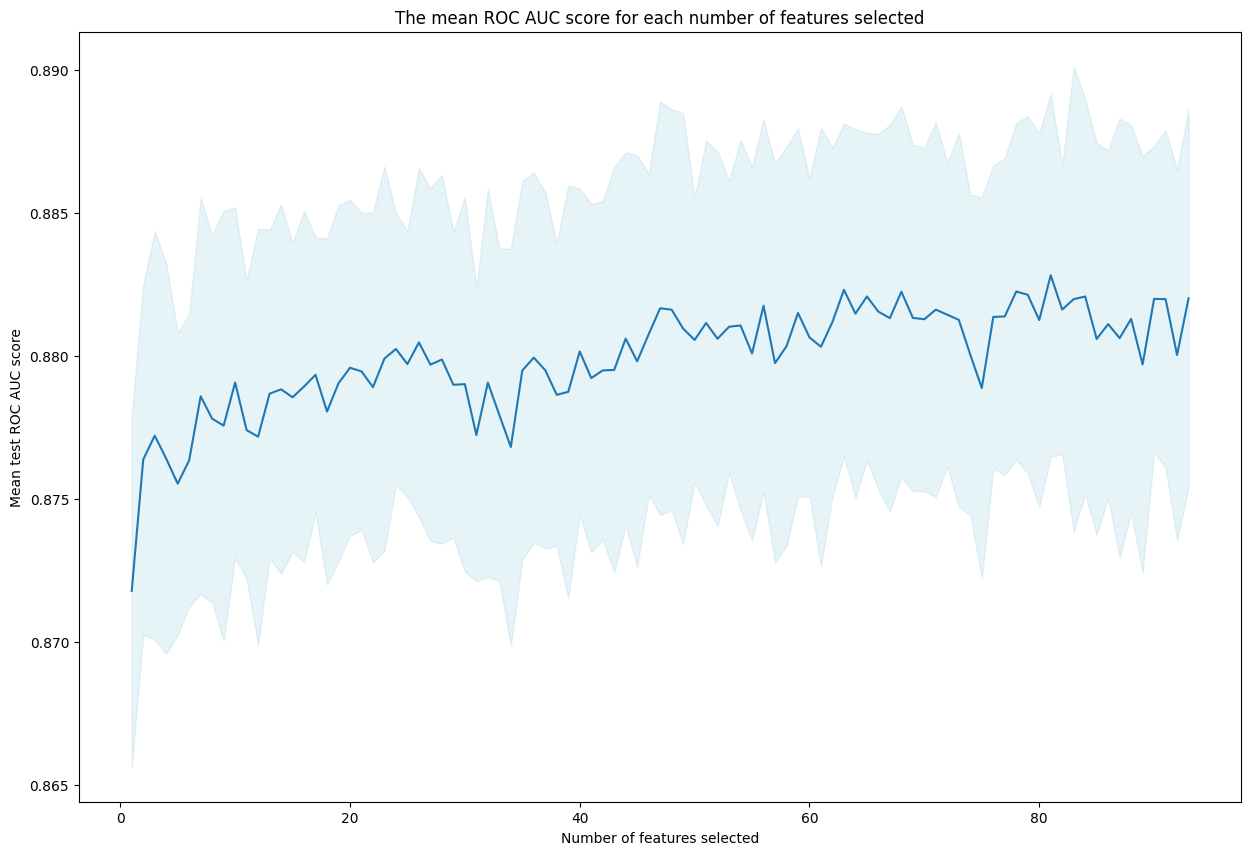

In [25]:
def plot_features_vs_cvscore(rfecv_model):
    n_features = len(rfecv_model.cv_results_["mean_test_score"])
    plt.figure(figsize = (15,10))
    plt.xlabel("Number of features selected")
    plt.ylabel("Mean test ROC AUC score")
    plt.plot(range(1, n_features + 1), rfecv_model.cv_results_["mean_test_score"])
    plt.fill_between(range(1, n_features + 1), 
                     rfecv_model.cv_results_["mean_test_score"] - rfecv_model.cv_results_["std_test_score"], 
                     rfecv_model.cv_results_["mean_test_score"] + rfecv_model.cv_results_["std_test_score"], 
                     alpha=0.3, 
                     color="lightblue")
    plt.title("The mean ROC AUC score for each number of features selected")
    plt.show()
    
plot_features_vs_cvscore(selector) # Nao sei porque ta a dar erro, pode ser da minha versao do sklearn

O gráfico mostra a variação do desempenho do modelo (**AUC ROC médio**) em função do número de atributos incluídos no treino.

- A **linha azul** representa o valor médio da AUC ROC ao longo das iterações da validação cruzada.
- A **zona azul clara** corresponde ao intervalo de uma unidade de desvio padrão, fornecendo uma ideia da incerteza nas estimativas.
- Observa-se uma tendência geral de **aumento na AUC até cerca de 60-80 atributos**, onde estabiliza.
- A **seleção com 180 atributos** está dentro da região de plateau, o que sugere que esse número mantém o equilíbrio entre desempenho e generalização.

### Seleção Final de Atributos

Com base na análise de desempenho do modelo (AUC ROC médio), foram selecionadas **180 features** como o número ótimo de atributos, garantindo um bom equilíbrio entre desempenho e generalização.

A lista das 180 variáveis selecionadas pelo `RFECV` inclui descritores moleculares relevantes, como:

- `MaxEStateIndex`, `MinEStateIndex`, `MolWt`, `qed`, `NumValenceElectrons`, entre outros;
- descritores funcionais como `fr_sulfone`, `fr_urea`, `fr_unbrch_alkane`, `fr_thiazole`, etc.

Estas variáveis foram retidas no `DataFrame` com:

```python
features_filtered.columns[selector.support_]


In [26]:
len(features_filtered), len(selector.support_)
features_filtered.columns[selector.support_]

Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex',
       'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'MaxPartialCharge',
       ...
       'fr_priamide', 'fr_pyridine', 'fr_sulfide', 'fr_sulfonamd',
       'fr_sulfone', 'fr_tetrazole', 'fr_thiazole', 'fr_thiophene',
       'fr_unbrch_alkane', 'fr_urea'],
      dtype='object', length=180)

Em seguida, os dados normalizados (`X_scaled`) foram filtrados para incluir apenas as colunas correspondentes às features selecionadas:

```python
X_scaled[:, selector.support_]  # Mantém todas as amostras, mas apenas as 180 colunas selecionadas

In [35]:
X_scaled[:, selector.support_] # Keep the rows, filter the columns

array([[ 0.57470029,  0.48253239,  0.57470029, ..., -0.25073392,
         1.12620206, -0.20666472],
       [-1.91429792,  1.06716821, -1.91429792, ..., -0.25073392,
        -0.16499742, -0.20666472],
       [-2.06537174,  0.45700395, -2.06537174, ..., -0.25073392,
        -0.16499742, -0.20666472],
       ...,
       [ 0.78673737, -0.09737207,  0.78673737, ..., -0.25073392,
        -0.16499742, -0.20666472],
       [ 0.7082882 , -0.19525339,  0.7082882 , ..., -0.25073392,
        -0.16499742, -0.20666472],
       [-0.20794688,  0.27620809, -0.20794688, ..., -0.25073392,
        -0.16499742, -0.20666472]], shape=(11934, 180))

Esta matriz de entrada reduzida será utilizada como base para os próximos modelos, com o objetivo de melhorar a generalização e reduzir o custo computacional.

## Avaliação dos Modelos com Conjunto Reduzido de Atributos
Após a seleção de 180 atributos utilizando `RFECV`, foi realizada uma nova avaliação de desempenho dos modelos utilizando **apenas o conjunto reduzido de features**. O objetivo foi verificar se, com menos variáveis, é possível manter (ou até melhorar) a capacidade preditiva dos modelos, ao mesmo tempo que se reduz o custo computacional e o risco de overfitting.

Foram testados os seguintes algoritmos:

- Random Forest
- Gradient Boosting
- SGD Classifier
- SVC (Support Vector Classifier)
- Decision Tree
- K-Nearest Neighbors (KNN)

Para cada modelo, foram obtidas:

- A curva ROC e a área sob a curva (AUC)
- Métricas calculadas em múltiplos thresholds: 
  - True Positive Rate (TPR / recall)
  - False Positive Rate (FPR)
  - F1 Score
  - Precision
  - Specificity

Essa abordagem permite comparar os modelos não apenas em termos de AUC, mas também considerando diferentes compromissos entre precisão e recall, o que é especialmente útil em contextos com **desequilíbrio entre as classes** ou **requisitos clínicos específicos** (por exemplo, evitar falsos negativos).


--- Relatório de Classificação para Random Forest ---


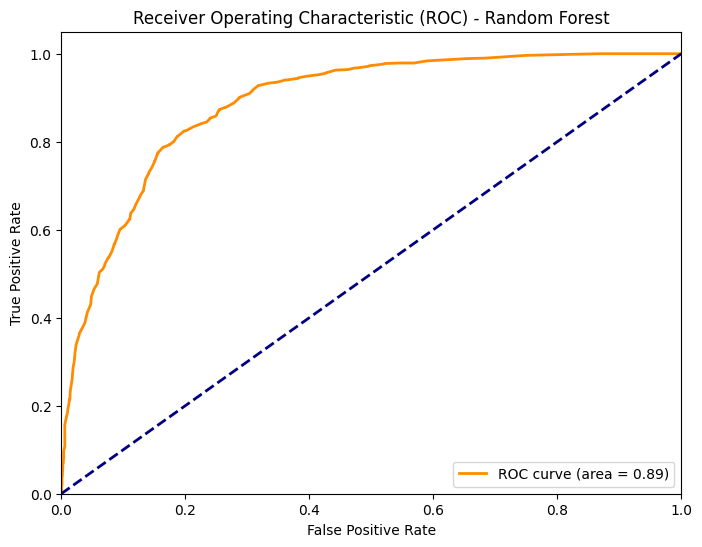

   Threshold   TP    TN   FP   FN       TPR       FPR  F1 Score  Precision  \
0       0.50  529  1392  190  276  0.657143  0.120101  0.694226   0.735744   
1       0.60  418  1471  111  387  0.519255  0.070164  0.626687   0.790170   
2       0.70  291  1536   46  514  0.361491  0.029077  0.509632   0.863501   
3       0.80  162  1563   19  643  0.201242  0.012010  0.328600   0.895028   
4       0.90   48  1578    4  757  0.059627  0.002528  0.112019   0.923077   
5       0.95   23  1580    2  782  0.028571  0.001264  0.055422   0.920000   
6       0.99    8  1581    1  797  0.009938  0.000632  0.019656   0.888889   

   Specificity  
0     0.879899  
1     0.929836  
2     0.970923  
3     0.987990  
4     0.997472  
5     0.998736  
6     0.999368  

--- Relatório de Classificação para Gradient Boosting ---


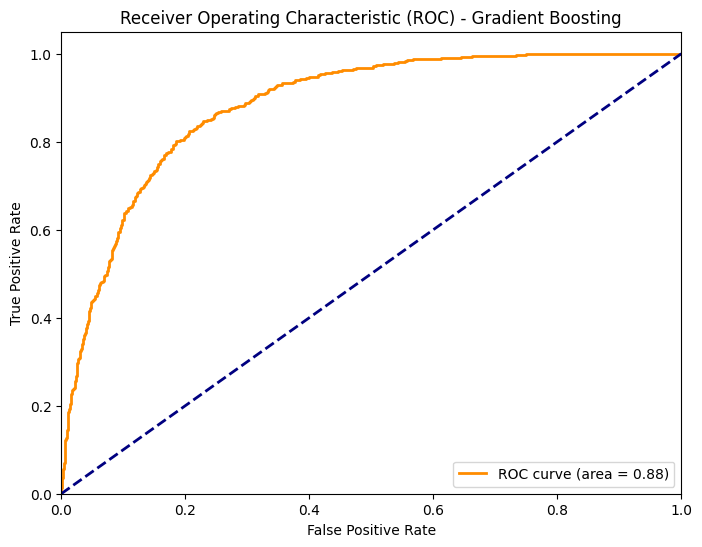

   Threshold   TP    TN   FP   FN       TPR       FPR  F1 Score  Precision  \
0       0.50  544  1391  191  261  0.675776  0.120733  0.706494   0.740136   
1       0.60  450  1449  133  355  0.559006  0.084071  0.648415   0.771870   
2       0.70  329  1511   71  476  0.408696  0.044880  0.546058   0.822500   
3       0.80  165  1558   24  640  0.204969  0.015171  0.331992   0.873016   
4       0.90   24  1579    3  781  0.029814  0.001896  0.057692   0.888889   
5       0.95    2  1582    0  803  0.002484  0.000000  0.004957   1.000000   
6       0.99    0  1582    0  805  0.000000  0.000000  0.000000   0.000000   

   Specificity  
0     0.879267  
1     0.915929  
2     0.955120  
3     0.984829  
4     0.998104  
5     1.000000  
6     1.000000  

--- Relatório de Classificação para SGD ---


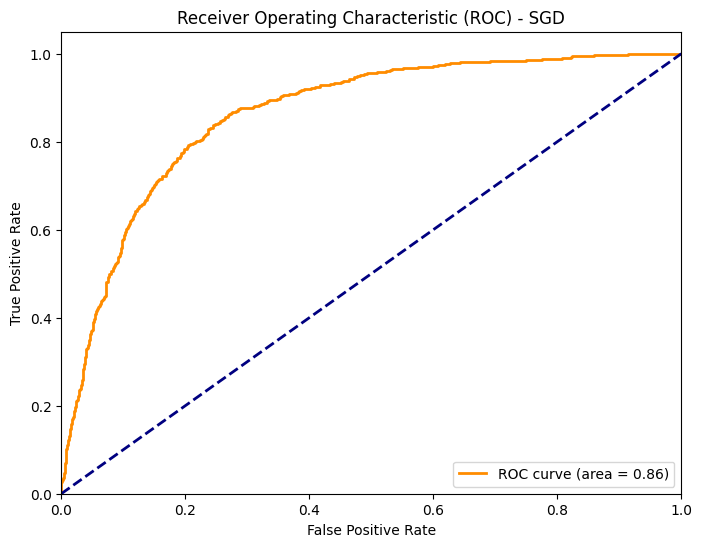

   Threshold   TP    TN   FP   FN       TPR       FPR  F1 Score  Precision  \
0       0.50  554  1354  228  251  0.688199  0.144121  0.698173   0.708440   
1       0.60  494  1407  175  311  0.613665  0.110619  0.670285   0.738416   
2       0.70  410  1450  132  395  0.509317  0.083439  0.608760   0.756458   
3       0.80  323  1496   86  482  0.401242  0.054362  0.532125   0.789731   
4       0.90  196  1532   50  609  0.243478  0.031606  0.372978   0.796748   
5       0.95  111  1561   21  694  0.137888  0.013274  0.236926   0.840909   
6       0.99   19  1582    0  786  0.023602  0.000000  0.046117   1.000000   

   Specificity  
0     0.855879  
1     0.889381  
2     0.916561  
3     0.945638  
4     0.968394  
5     0.986726  
6     1.000000  

--- Relatório de Classificação para SVC ---


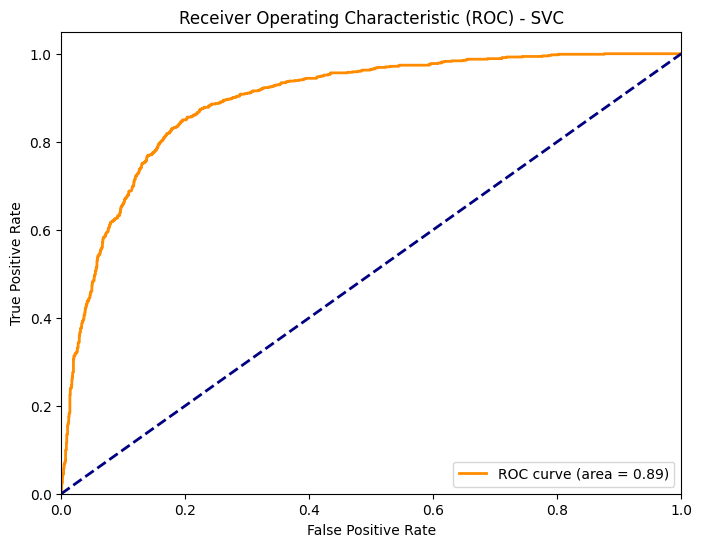

   Threshold   TP    TN   FP   FN       TPR       FPR  F1 Score  Precision  \
0       0.50  559  1401  181  246  0.694410  0.114412  0.723625   0.755405   
1       0.60  496  1456  126  309  0.616149  0.079646  0.695165   0.797428   
2       0.70  412  1493   89  393  0.511801  0.056258  0.630934   0.822355   
3       0.80  310  1530   52  495  0.385093  0.032870  0.531277   0.856354   
4       0.90  148  1561   21  657  0.183851  0.013274  0.303901   0.875740   
5       0.95   38  1576    6  767  0.047205  0.003793  0.089517   0.863636   
6       0.99    0  1582    0  805  0.000000  0.000000  0.000000   0.000000   

   Specificity  
0     0.885588  
1     0.920354  
2     0.943742  
3     0.967130  
4     0.986726  
5     0.996207  
6     1.000000  

--- Relatório de Classificação para Decision Tree ---


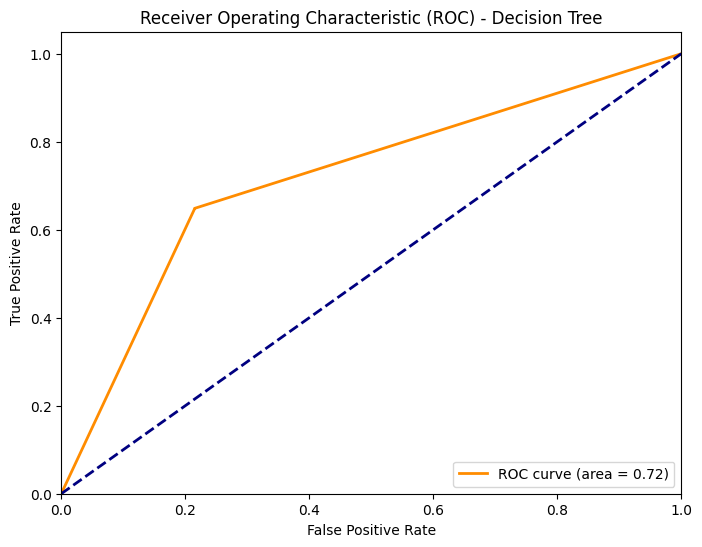

   Threshold   TP    TN   FP   FN       TPR       FPR  F1 Score  Precision  \
0       0.50  522  1242  340  283  0.648447  0.214918  0.626275   0.605568   
1       0.60  521  1242  340  284  0.647205  0.214918  0.625450   0.605110   
2       0.70  521  1242  340  284  0.647205  0.214918  0.625450   0.605110   
3       0.80  521  1242  340  284  0.647205  0.214918  0.625450   0.605110   
4       0.90  521  1242  340  284  0.647205  0.214918  0.625450   0.605110   
5       0.95  521  1242  340  284  0.647205  0.214918  0.625450   0.605110   
6       0.99  521  1242  340  284  0.647205  0.214918  0.625450   0.605110   

   Specificity  
0     0.785082  
1     0.785082  
2     0.785082  
3     0.785082  
4     0.785082  
5     0.785082  
6     0.785082  

--- Relatório de Classificação para KNN ---


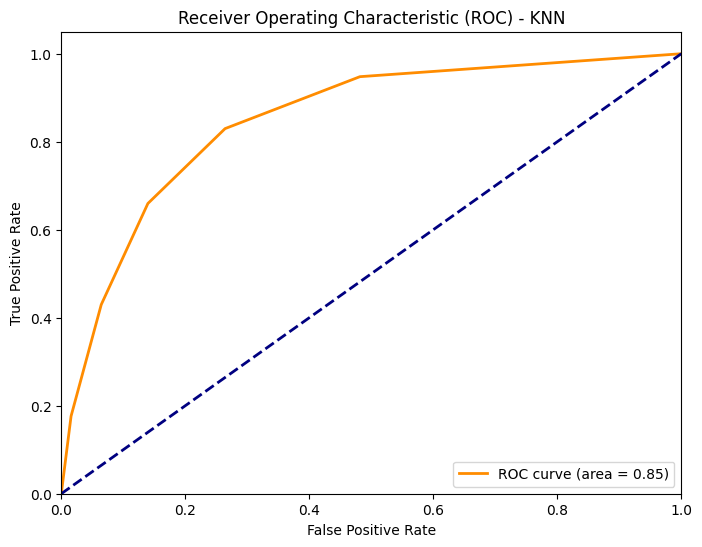

   Threshold   TP    TN   FP   FN       TPR       FPR  F1 Score  Precision  \
0       0.50  531  1361  221  274  0.659627  0.139697  0.682081   0.706117   
1       0.60  531  1361  221  274  0.659627  0.139697  0.682081   0.706117   
2       0.70  346  1480  102  459  0.429814  0.064475  0.552275   0.772321   
3       0.80  346  1480  102  459  0.429814  0.064475  0.552275   0.772321   
4       0.90  142  1557   25  663  0.176398  0.015803  0.292181   0.850299   
5       0.95  142  1557   25  663  0.176398  0.015803  0.292181   0.850299   
6       0.99  142  1557   25  663  0.176398  0.015803  0.292181   0.850299   

   Specificity  
0     0.860303  
1     0.860303  
2     0.935525  
3     0.935525  
4     0.984197  
5     0.984197  
6     0.984197  


In [ ]:
model_performance = {}
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SGD": SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3, random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}
for name, model in models.items():
    model.fit(X_train[:, selector.support_], y_train)
    
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test[:, selector.support_])[:, 1]
    else:
        y_proba = model.decision_function(X_test[:, selector.support_])
        from sklearn.preprocessing import MinMaxScaler
        y_proba = MinMaxScaler().fit_transform(y_proba.reshape(-1, 1)).ravel()
    
    y_pred = model.predict(X_test[:, selector.support_])
    
    model_performance[name] = {
        "y_pred": y_pred,
        "y_proba": y_proba
    }

for model_name, perf in model_performance.items():
    y_pred = perf["y_pred"]
    y_proba = perf["y_proba"]

    print(f"\n--- Relatório de Classificação para {model_name} ---")
    
    # Curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc_score:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Avaliar thresholds
    performance_metrics = []
    for threshold in [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]:
        y_thresh = (y_proba >= threshold).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_thresh, labels=[0, 1]).ravel()
        
        tpr_val = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr_val = fp / (fp + tn) if (fp + tn) > 0 else 0
        fnr = fn / (tp + fn) if (tp + fn) > 0 else 0
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        f1 = 2 * precision * tpr_val / (precision + tpr_val) if (precision + tpr_val) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        performance_metrics.append({
            "Threshold": threshold,
            "TP": tp, "TN": tn, "FP": fp, "FN": fn,
            "TPR": tpr_val,
            "FPR": fpr_val,
            "F1 Score": f1,
            "Precision": precision,
            "Specificity": specificity
        })

    performance_df = pd.DataFrame(performance_metrics)
    print(performance_df)

### **Conclusões da Avaliação**

- **Gradient Boosting** e **Random Forest** apresentaram os melhores desempenhos gerais, com **AUC próximas de 0.89**, além de boa precisão e F1 score em thresholds intermediários.
- **SGDClassifier** e **SVC** mostraram desempenho competitivo, com AUC entre **0.86 e 0.88**, e boa capacidade de generalização.
- **Decision Tree** teve desempenho similar ao Random Forest no AUC, mas foi ligeiramente inferior nas métricas F1 e precisão em thresholds mais altos.
- **KNN** apresentou o pior desempenho global (AUC ~0.72 com todos os thresholds iguais), indicando possível sensibilidade à redução dimensional e à escala dos dados.

**Importante:** como discutido anteriormente, **não se deve olhar apenas para a AUC**, mas também para o comportamento das demais métricas de acordo com o objetivo do problema. Por exemplo:

- Em problemas onde **evitar falsos positivos é crítico**, pode-se optar por thresholds mais altos e analisar a **Precision** ou **F0.5**.
- Quando há desequilíbrio entre classes, métricas como **TPR**, **FPR** e **Specificity** são mais informativas do que apenas TP/FP absolutos.

---

A análise mostra que mesmo com 180 atributos, é possível manter um desempenho robusto, reforçando a eficácia da seleção de features como etapa fundamental no pipeline de machine learning.

### Avaliação Rápida dos Modelos com Métricas Padrão

Este bloco de código realiza uma **avaliação direta dos modelos treinados** com base no conjunto de teste. Para cada modelo incluído no dicionário `models`, são feitas as seguintes etapas:

1. O modelo é treinado com `model.fit(X_train, y_train)`;
2. As previsões (`y_pred`) são feitas com base nos dados de teste (`X_test`);
3. Calcula-se a **acurácia** com `accuracy_score`;
4. Exibe-se a matriz de confusão;
5. Imprime-se o relatório de classificação com:
   - `precision`: taxa de verdadeiros positivos entre todos os positivos previstos;
   - `recall` (ou TPR): taxa de verdadeiros positivos entre os positivos reais;
   - `f1-score`: média harmônica entre precisão e recall.

Este bloco é útil para **obter uma visão geral** do desempenho dos modelos sem entrar em análises mais profundas como curvas ROC ou variações de thresholds.

**Observação:**
Este tipo de análise **não depende de probabilidades**, apenas das classes previstas (`y_pred`). Para tarefas com **desbalanceamento de classes** ou quando é necessário **ajustar o threshold de decisão**, recomenda-se utilizar também métricas baseadas em probabilidades, como a curva ROC ou a análise por `threshold` (como feito anteriormente).

In [41]:
# Avaliar modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f" {name} - Accuracy: {acc:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

 Random Forest - Accuracy: 0.8077
[[1392  190]
 [ 269  536]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1582
           1       0.74      0.67      0.70       805

    accuracy                           0.81      2387
   macro avg       0.79      0.77      0.78      2387
weighted avg       0.80      0.81      0.81      2387

 Gradient Boosting - Accuracy: 0.8106
[[1391  191]
 [ 261  544]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1582
           1       0.74      0.68      0.71       805

    accuracy                           0.81      2387
   macro avg       0.79      0.78      0.78      2387
weighted avg       0.81      0.81      0.81      2387

 SGD - Accuracy: 0.7985
[[1352  230]
 [ 251  554]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1582
           1       0.71      0.69      0.70       805

    a

## Curvas ROC e AUC para todos os modelos


A seguir, são apresentadas as curvas ROC e as respetivas áreas sob a curva para cada modelo treinado. 
Esta análise é importante para complementar a análise com as métricas anteriores (como F1-score, precision e recall)



--- Relatório de Classificação para Random Forest ---


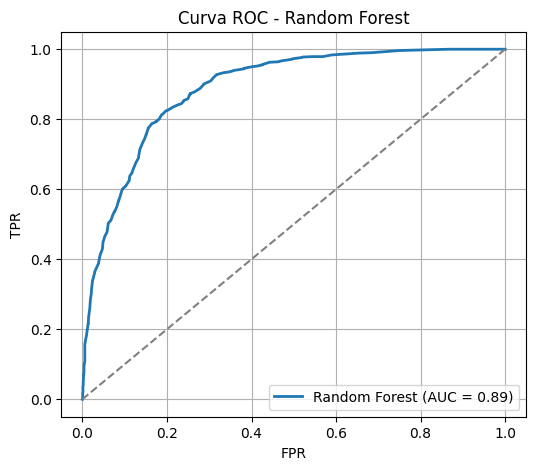


--- Relatório de Classificação para Gradient Boosting ---


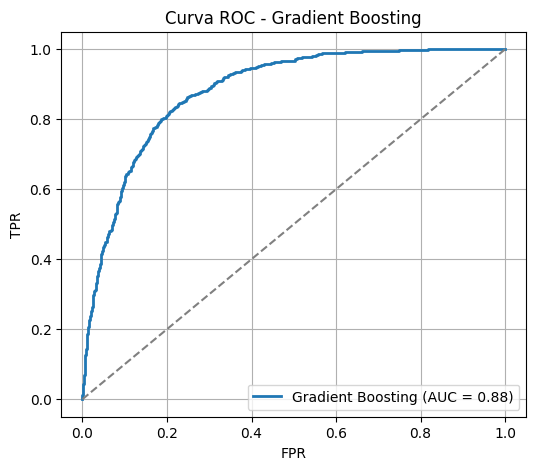


--- Relatório de Classificação para SGD ---


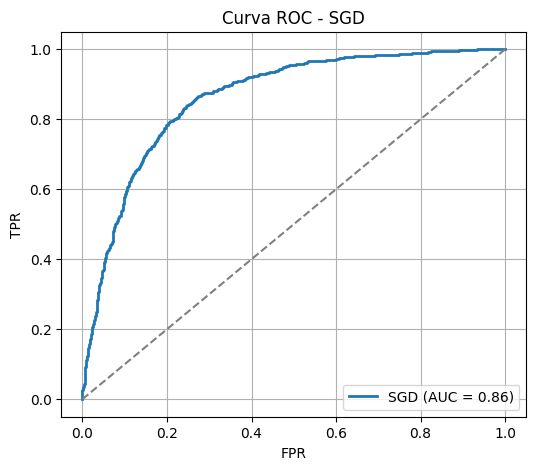


--- Relatório de Classificação para SVC ---


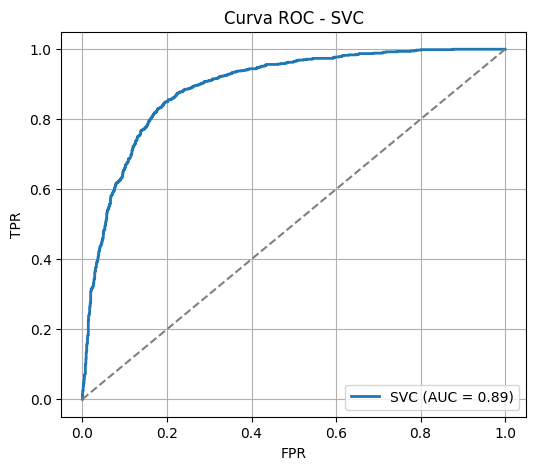


--- Relatório de Classificação para Decision Tree ---


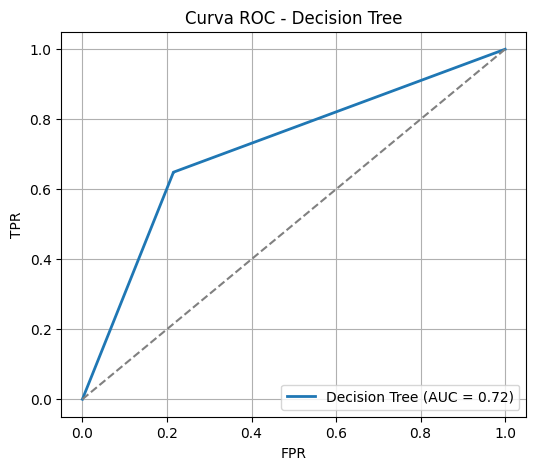


--- Relatório de Classificação para KNN ---


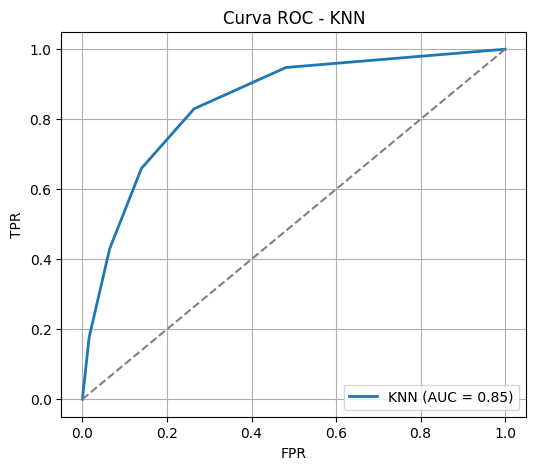

In [42]:
for model_name, perf in model_performance.items():
    y_pred = perf["y_pred"]
    y_proba = perf["y_proba"]

    print(f"\n--- Relatório de Classificação para {model_name} ---")

    # Calcular curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)

    # Plotar curva ROC
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc_score:.2f})", lw=2)
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title(f"Curva ROC - {model_name}")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

Através das curvas ROC e valores de AUC é possível observar que alguns modelos apresentam maior capacidade discriminativa. Por exemplo, classificadores como **Random Forest** e **Gradient Boosting** tendem a apresentar AUC mais elevados, indicando melhor separação entre as classes positivas e negativas.

Modelos com curvas mais próximas do canto superior esquerdo e AUCs superiores a 0.85 podem ser considerados fortes candidatos, mas a **decisão final** deve considerar também os falsos positivos e falsos negativos com base nos objetivos do problema.